# GeneGuru-

**Exploring the Genetic Underpinnings of Cancer Using GeneGuru**

Cancer is a multifaceted disease characterized by abnormal cell growth and division, often resulting in the formation of malignant tumors. Genetic factors play a significant role in the development and progression of cancer, as various mutations and genomic alterations have been implicated in the onset and advancement of the disease. In this notebook, we will leverage the power of the GeneGuru platform to analyze and explore the genetic landscape of cancer.


**Our primary objectives include:**
    
1. Identification of recurrently mutated genes and pathways that contribute to cancer development
2. Characterization of genomic alterations, such as copy number variations and structural rearrangements, associated with cancer progression
3. Exploration of gene expression profiles to identify differentially expressed genes in cancerous versus healthy tissue
4. Application of machine learning algorithms for cancer classification and prediction based on genetic data

By utilizing the comprehensive genomic data and analytical tools provided by GeneGuru, we aim to gain valuable insights into the genetic underpinnings of cancer and contribute to the development of targeted therapies and precision medicine approaches in cancer treatment.

**Step 1: Load the Dataset**

First, we need to load the dataset and take a look at its structure to understand what kind of data we're dealing with.


In [103]:
import pandas as pd

# Load the dataset
file_path ='/Users/alirazi/Downloads/METABRIC_RNA_Mutation.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


patient_id  age_at_diagnosis type_of_breast_surgery    cancer_type  \
0           0             75.65             MASTECTOMY  Breast Cancer   
1           2             43.19      BREAST CONSERVING  Breast Cancer   
2           5             48.87             MASTECTOMY  Breast Cancer   
3           6             47.68             MASTECTOMY  Breast Cancer   
4           8             76.97             MASTECTOMY  Breast Cancer   

                        cancer_type_detailed cellularity  chemotherapy  \
0           Breast Invasive Ductal Carcinoma         NaN             0   
1           Breast Invasive Ductal Carcinoma        High             0   
2           Breast Invasive Ductal Carcinoma        High             1   
3  Breast Mixed Ductal and Lobular Carcinoma    Moderate             1   
4  Breast Mixed Ductal and Lobular Carcinoma        High             1   

  pam50_+_claudin-low_subtype  cohort er_status_measured_by_ihc  ... mtap_mut  \
0                 claudin-low     1.0                   Positve  ...        0   
1                        LumA     1.0                   Positve  ...        0   
2                        LumB     1.0                   Positve  ...        0   
3                        LumB     1.0                   Positve  ...        0   
4                        LumB     1.0                   Positve  ...        0   

   ppp2cb_mut smarcd1_mut nras_mut ndfip1_mut  hras_mut prps2_mut smarcb1_mut  \
0           0           0        0          0         0         0           0   
1           0           0        0          0         0         0           0   
2           0           0        0          0         0         0           0   
3           0           0        0          0         0         0           0   
4           0           0        0          0         0         0           0   

  stmn2_mut  siah1_mut  
0         0          0  
1         0          0  
2         0          0  
3         0          0  
4         0          0  

[5 rows x 693 columns]

In [4]:
#Basic libraries
import numpy as np
import pandas as pd
from scipy import stats


In [5]:
!pip install yellowbrick


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 770.8 kB/s eta 0:00:00a 0:00:01


In [8]:
!pip install matplotlib-venn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 267.2 kB/s eta 0:00:00 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.1-py3-none-any.whl size=45286 sha256=6efe94c087688ad819af1d5f247e5477200f7a15b980b051aeca31a5110c9a37
  Stored in directory: /Users/alirazi/Library/Caches/pip/wheels/8a/29/52/4d90d9556445079f88255b87a75d951357eff52d0795b88f4f
Successfully built matplotlib-venn


In [10]:
# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import yellowbrick as yb
from matplotlib.colors import ListedColormap
from yellowbrick.classifier import ROCAUC
from matplotlib_venn import venn3
import matplotlib.patches as mpatches

In [12]:
# Statistics, EDA, metrics libraries
from scipy.stats import normaltest, skew
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, accuracy_score, f1_score
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import classification_report, confusion_matrix
from scipy.special import boxcox, inv_boxcox

In [14]:
!pip install xgboost 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 1.1 MB/s eta 0:00:0000:0100:010m


In [16]:
!pip install kmapper

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 485.4 kB/s eta 0:00:00a 0:00:01


In [17]:
# Modeling libraries
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict,  KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from scipy.stats import zscore
from itertools import combinations
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import IsolationForest
import kmapper as km
from sklearn.cluster import KMeans

In [20]:
from IPython.display import set_matplotlib_formats 
plt.style.use('ggplot')
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")


# Pallets used for visualizations
color= "Spectral"
color_plt = ListedColormap(sns.color_palette(color).as_hex())
color_hist = 'teal'
two_colors = [ sns.color_palette(color)[0], sns.color_palette(color)[5]]
three_colors = [ sns.color_palette(color)[5],sns.color_palette(color)[2], sns.color_palette(color)[0]]

In [22]:
# Display the column names and basic information about the dataset
data.info()

# Display summary statistics for numerical columns
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 693 entries, patient_id to siah1_mut
dtypes: float64(498), int64(5), object(190)
memory usage: 10.1+ MB


patient_id  age_at_diagnosis  chemotherapy       cohort  \
count  1904.000000       1904.000000   1904.000000  1904.000000   
mean   3921.982143         61.087054      0.207983     2.643908   
std    2358.478332         12.978711      0.405971     1.228615   
min       0.000000         21.930000      0.000000     1.000000   
25%     896.500000         51.375000      0.000000     1.000000   
50%    4730.500000         61.770000      0.000000     3.000000   
75%    5536.250000         70.592500      0.000000     3.000000   
max    7299.000000         96.290000      1.000000     5.000000   

       neoplasm_histologic_grade  hormone_therapy  \
count                1832.000000      1904.000000   
mean                    2.415939         0.616597   
std                     0.650612         0.486343   
min                     1.000000         0.000000   
25%                     2.000000         0.000000   
50%                     3.000000         1.000000   
75%                     3.000000         1.000000   
max                     3.000000         1.000000   

       lymph_nodes_examined_positive  mutation_count  \
count                    1904.000000     1859.000000   
mean                        2.002101        5.697687   
std                         4.079993        4.058778   
min                         0.000000        1.000000   
25%                         0.000000        3.000000   
50%                         0.000000        5.000000   
75%                         2.000000        7.000000   
max                        45.000000       80.000000   

       nottingham_prognostic_index  overall_survival_months  ...  \
count                  1904.000000              1904.000000  ...   
mean                      4.033019               125.121324  ...   
std                       1.144492                76.334148  ...   
min                       1.000000                 0.000000  ...   
25%                       3.046000                60.825000  ...   
50%                       4.042000               115.616667  ...   
75%                       5.040250               184.716667  ...   
max                       6.360000               355.200000  ...   

             srd5a1        srd5a2        srd5a3           st7         star  \
count  1.904000e+03  1.904000e+03  1.904000e+03  1.904000e+03  1904.000000   
mean   4.726891e-07 -3.676471e-07 -9.453782e-07 -1.050420e-07    -0.000002   
std    1.000263e+00  1.000262e+00  1.000262e+00  1.000263e+00     1.000262   
min   -2.120800e+00 -3.364800e+00 -2.719400e+00 -4.982700e+00    -2.981700   
25%   -6.188500e-01 -6.104750e-01 -6.741750e-01 -6.136750e-01    -0.632900   
50%   -2.456500e-01 -4.690000e-02 -1.422500e-01 -5.175000e-02    -0.026650   
75%    3.306000e-01  5.144500e-01  5.146000e-01  5.787750e-01     0.590350   
max    6.534900e+00  1.027030e+01  6.329000e+00  4.571300e+00    12.742300   

               tnk2         tulp4       ugt2b15      ugt2b17       ugt2b7  
count  1.904000e+03  1.904000e+03  1.904000e+03  1904.000000  1904.000000  
mean   3.676471e-07  4.726891e-07  7.878151e-07     0.000000     0.000000  
std    1.000264e+00  1.000262e+00  1.000263e+00     1.000262     1.000262  
min   -3.833300e+00 -3.609300e+00 -1.166900e+00    -2.112600    -1.051600  
25%   -6.664750e-01 -7.102000e-01 -5.058250e-01    -0.476200    -0.726000  
50%    7.000000e-04 -2.980000e-02 -2.885500e-01    -0.133400    -0.424800  
75%    6.429000e-01  5.957250e-01  6.022500e-02     0.270375     0.428400  
max    3.938800e+00  3.833400e+00  1.088490e+01    12.643900     3.284400  

[8 rows x 503 columns]

In [24]:
data.head()

patient_id  age_at_diagnosis type_of_breast_surgery    cancer_type  \
0           0             75.65             MASTECTOMY  Breast Cancer   
1           2             43.19      BREAST CONSERVING  Breast Cancer   
2           5             48.87             MASTECTOMY  Breast Cancer   
3           6             47.68             MASTECTOMY  Breast Cancer   
4           8             76.97             MASTECTOMY  Breast Cancer   

                        cancer_type_detailed cellularity  chemotherapy  \
0           Breast Invasive Ductal Carcinoma         NaN             0   
1           Breast Invasive Ductal Carcinoma        High             0   
2           Breast Invasive Ductal Carcinoma        High             1   
3  Breast Mixed Ductal and Lobular Carcinoma    Moderate             1   
4  Breast Mixed Ductal and Lobular Carcinoma        High             1   

  pam50_+_claudin-low_subtype  cohort er_status_measured_by_ihc  ... mtap_mut  \
0                 claudin-low     1.0                   Positve  ...        0   
1                        LumA     1.0                   Positve  ...        0   
2                        LumB     1.0                   Positve  ...        0   
3                        LumB     1.0                   Positve  ...        0   
4                        LumB     1.0                   Positve  ...        0   

   ppp2cb_mut smarcd1_mut nras_mut ndfip1_mut  hras_mut prps2_mut smarcb1_mut  \
0           0           0        0          0         0         0           0   
1           0           0        0          0         0         0           0   
2           0           0        0          0         0         0           0   
3           0           0        0          0         0         0           0   
4           0           0        0          0         0         0           0   

  stmn2_mut  siah1_mut  
0         0          0  
1         0          0  
2         0          0  
3         0          0  
4         0          0  

[5 rows x 693 columns]

In [26]:
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1904 rows and 693 columns


In [28]:
#Finding missing data and the percentage of it in each column
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total_NaN', 'Percent_Nan'])
missing_data.head(14)

Total_NaN  Percent_Nan
tumor_stage                           501     0.263130
3-gene_classifier_subtype             204     0.107143
primary_tumor_laterality              106     0.055672
neoplasm_histologic_grade              72     0.037815
cellularity                            54     0.028361
mutation_count                         45     0.023634
er_status_measured_by_ihc              30     0.015756
type_of_breast_surgery                 22     0.011555
tumor_size                             20     0.010504
cancer_type_detailed                   15     0.007878
oncotree_code                          15     0.007878
tumor_other_histologic_subtype         15     0.007878
death_from_cancer                       1     0.000525
ar                                      0     0.000000

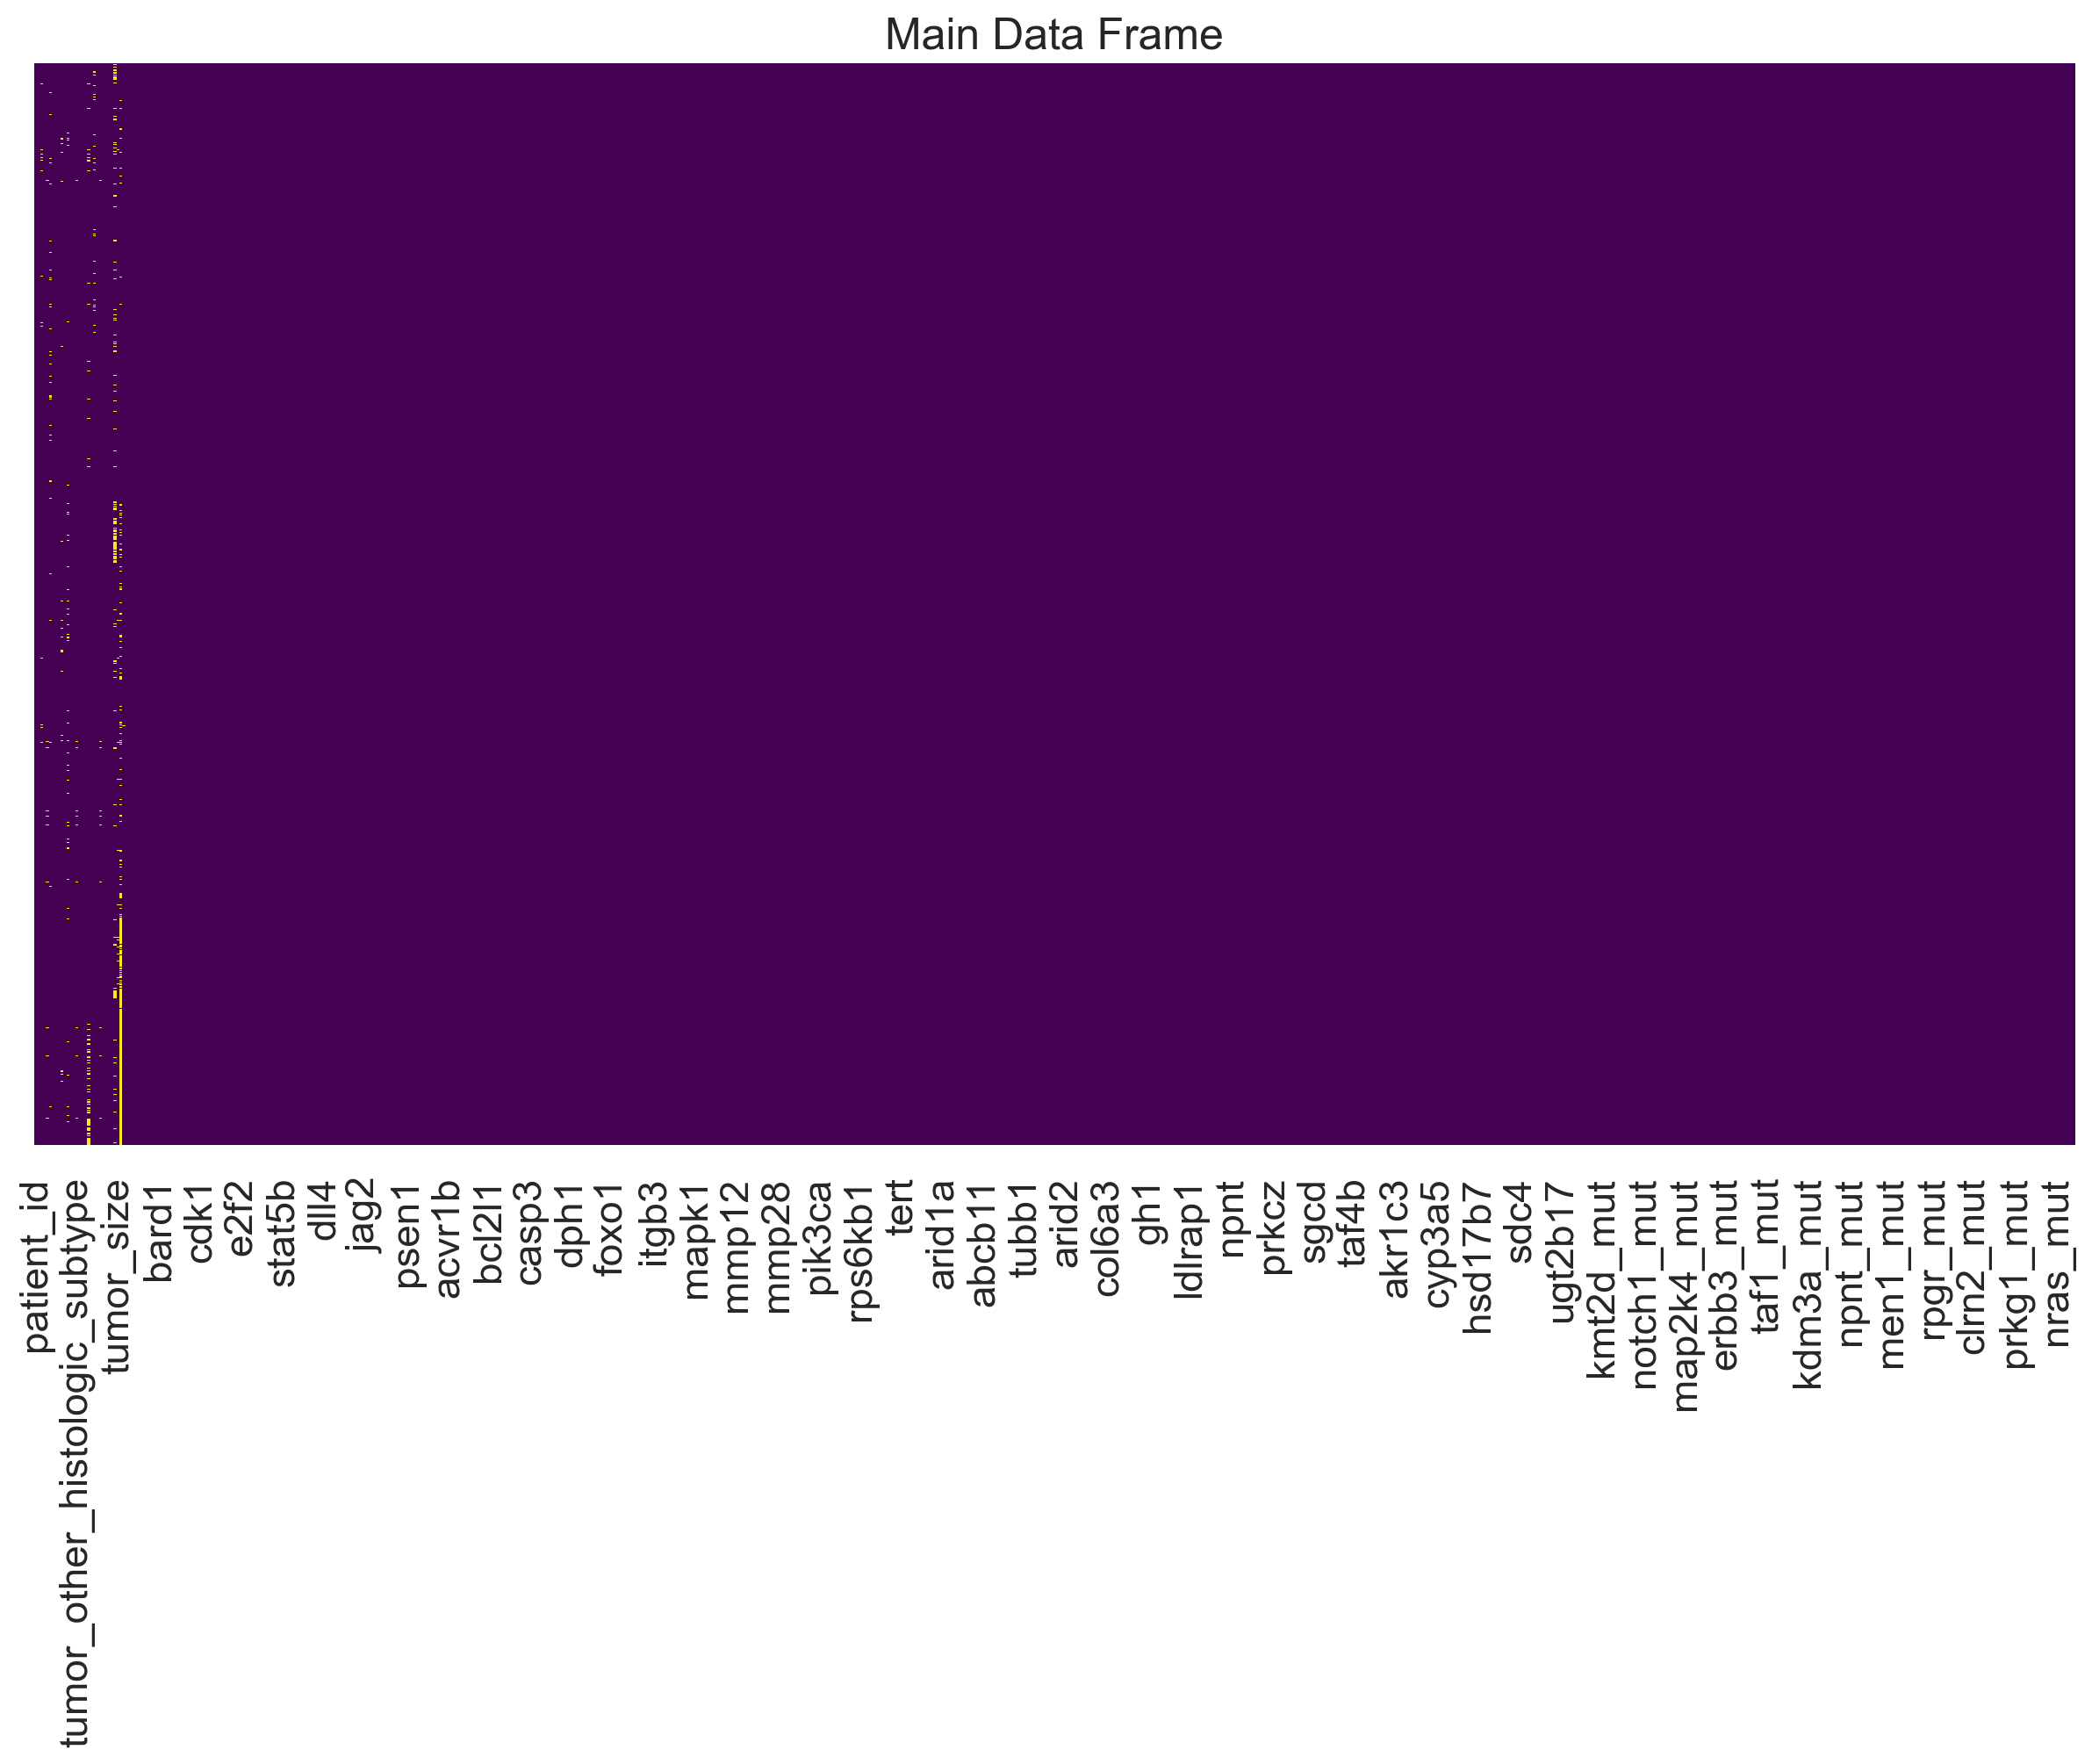

In [30]:
# Visualization of missing data
fig, ax = plt.subplots( figsize = (15, 8))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
ax.set_title('Main Data Frame')
plt.show();

**Exploratory Data Analysis and Data Visualization**

a) Relationship between clinical attributes and outcomes




In [33]:
# create a new dataframe for clinical attributes only
clinical_features_to_drop = data.columns[31:] # non clinical attributes
clinical_data = data.drop(clinical_features_to_drop, axis=1)
clinical_data.head()

patient_id  age_at_diagnosis type_of_breast_surgery    cancer_type  \
0           0             75.65             MASTECTOMY  Breast Cancer   
1           2             43.19      BREAST CONSERVING  Breast Cancer   
2           5             48.87             MASTECTOMY  Breast Cancer   
3           6             47.68             MASTECTOMY  Breast Cancer   
4           8             76.97             MASTECTOMY  Breast Cancer   

                        cancer_type_detailed cellularity  chemotherapy  \
0           Breast Invasive Ductal Carcinoma         NaN             0   
1           Breast Invasive Ductal Carcinoma        High             0   
2           Breast Invasive Ductal Carcinoma        High             1   
3  Breast Mixed Ductal and Lobular Carcinoma    Moderate             1   
4  Breast Mixed Ductal and Lobular Carcinoma        High             1   

  pam50_+_claudin-low_subtype  cohort er_status_measured_by_ihc  ...  \
0                 claudin-low     1.0                   Positve  ...   
1                        LumA     1.0                   Positve  ...   
2                        LumB     1.0                   Positve  ...   
3                        LumB     1.0                   Positve  ...   
4                        LumB     1.0                   Positve  ...   

  nottingham_prognostic_index  oncotree_code overall_survival_months  \
0                       6.044            IDC              140.500000   
1                       4.020            IDC               84.633333   
2                       4.030            IDC              163.700000   
3                       4.050           MDLC              164.933333   
4                       6.080           MDLC               41.366667   

  overall_survival pr_status  radio_therapy 3-gene_classifier_subtype  \
0                1  Negative              1                 ER-/HER2-   
1                1  Positive              1     ER+/HER2- High Prolif   
2                0  Positive              0                       NaN   
3                1  Positive              1                       NaN   
4                0  Positive              1     ER+/HER2- High Prolif   

  tumor_size tumor_stage  death_from_cancer  
0       22.0         2.0             Living  
1       10.0         1.0             Living  
2       15.0         2.0    Died of Disease  
3       25.0         2.0             Living  
4       40.0         2.0    Died of Disease  

[5 rows x 31 columns]

In [35]:
clinical_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      1904 non-null   int64  
 1   age_at_diagnosis                1904 non-null   float64
 2   type_of_breast_surgery          1882 non-null   object 
 3   cancer_type                     1904 non-null   object 
 4   cancer_type_detailed            1889 non-null   object 
 5   cellularity                     1850 non-null   object 
 6   chemotherapy                    1904 non-null   int64  
 7   pam50_+_claudin-low_subtype     1904 non-null   object 
 8   cohort                          1904 non-null   float64
 9   er_status_measured_by_ihc       1874 non-null   object 
 10  er_status                       1904 non-null   object 
 11  neoplasm_histologic_grade       1832 non-null   float64
 12  her2_status_measured_by_snp6    19

**The Distribution of Clinical Columns in the Dataframe**

In [38]:
# a function that takes a dataframe and transforms it into a standard form after dropping nun_numirical columns
def to_standard (data):
    
    num_data = data[data.select_dtypes(include = np.number).columns.tolist()]
    
    ss = StandardScaler()
    std = ss.fit_transform(num_data)
    
    std_data = pd.DataFrame(std, index = num_data.index, columns = num_data.columns)
    return std_data

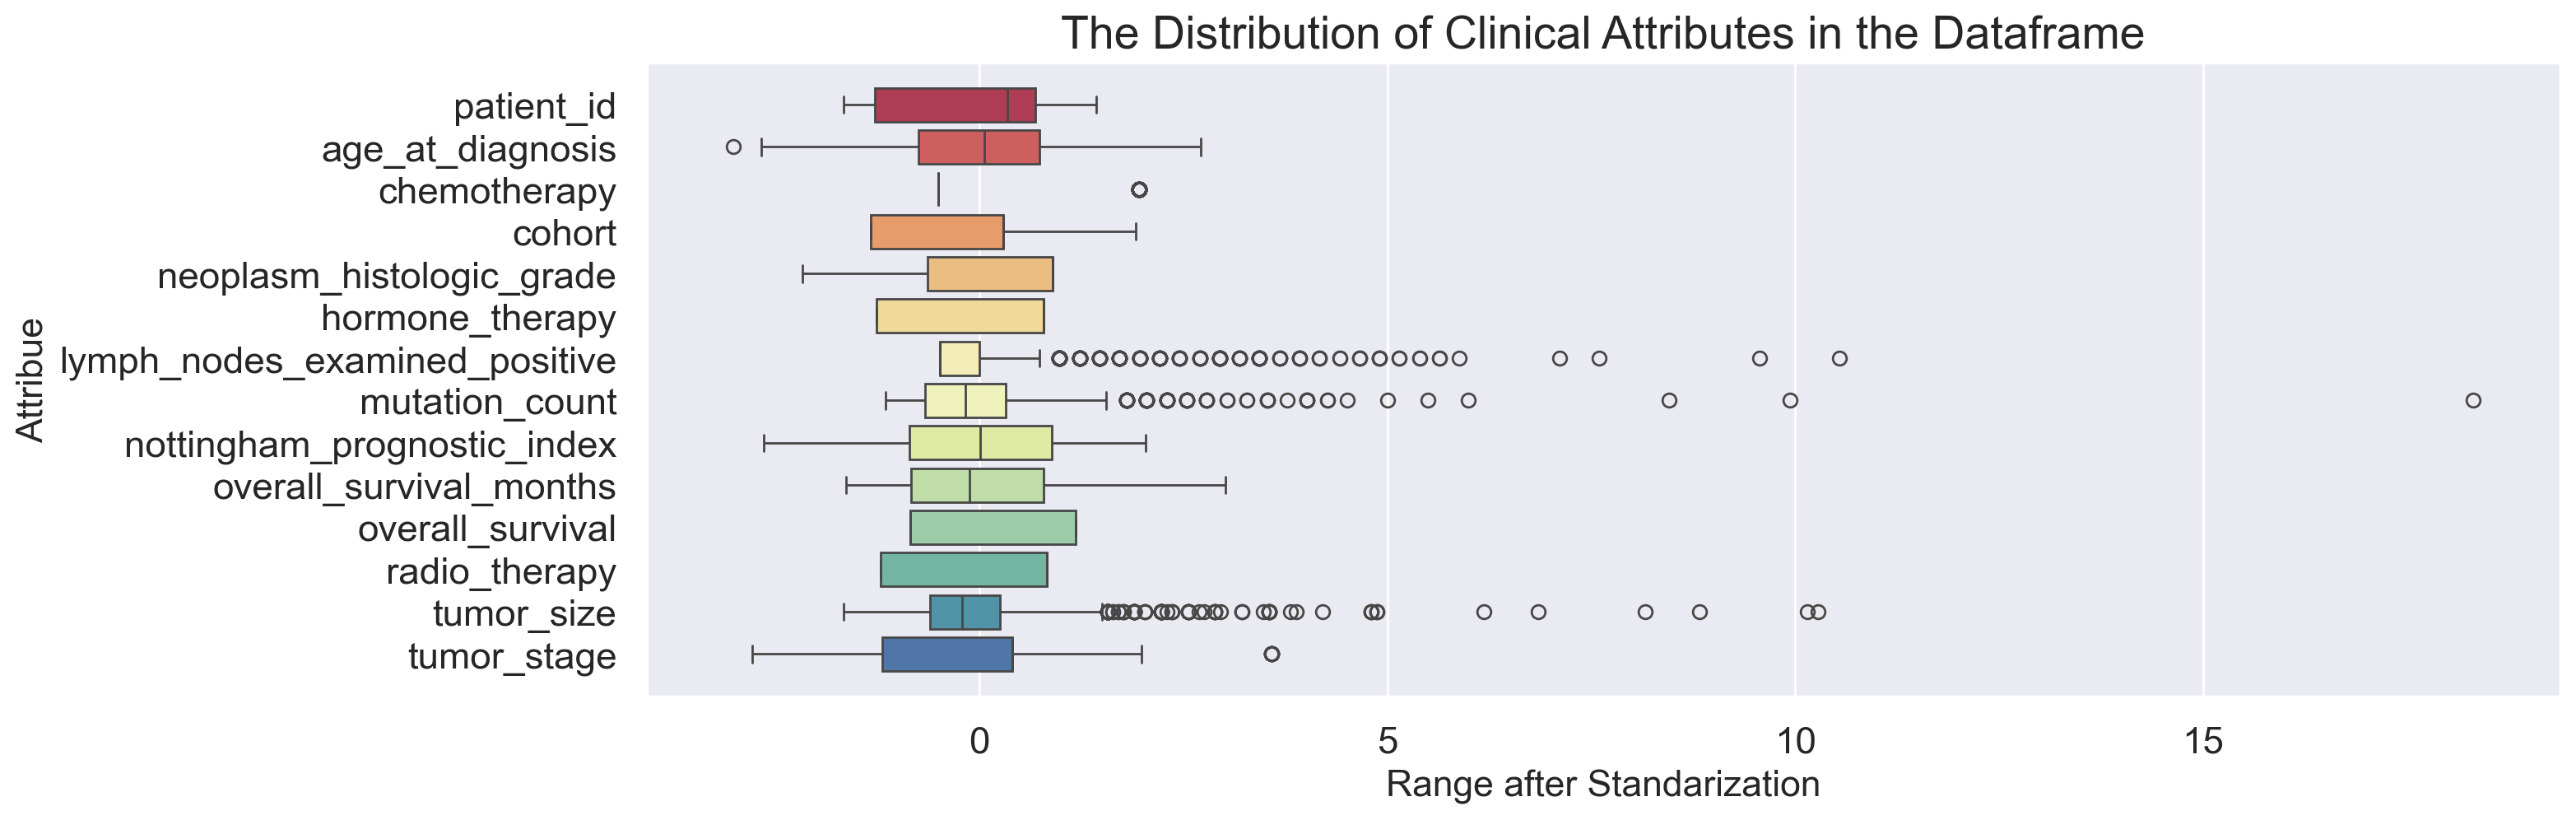

In [40]:
ax, fig = plt.subplots(1, 1, figsize = (15, 5))
plt.title('The Distribution of Clinical Attributes in the Dataframe', fontsize = 20) #Change please

sns.boxplot(y = "variable", x = "value", data = pd.melt(to_standard(clinical_data)), palette = 'Spectral')
plt.xlabel('Range after Standarization', size = 16)
plt.ylabel('Attribue', size = 16)

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.show()

For the distribution of all numerical data, some of them are normally distributed (like tumor_stage, and age_at_diagnosis), but most of the features are right skewed with a lot of outliers (lymph_nodes_examined_positive, mutation_count, and tumor_size). We decided to keep the outliers, as they are very important in healthcare data.

**The Distribution of the Two Target Classes in Numerical Clinical Columns in the Dataframe**

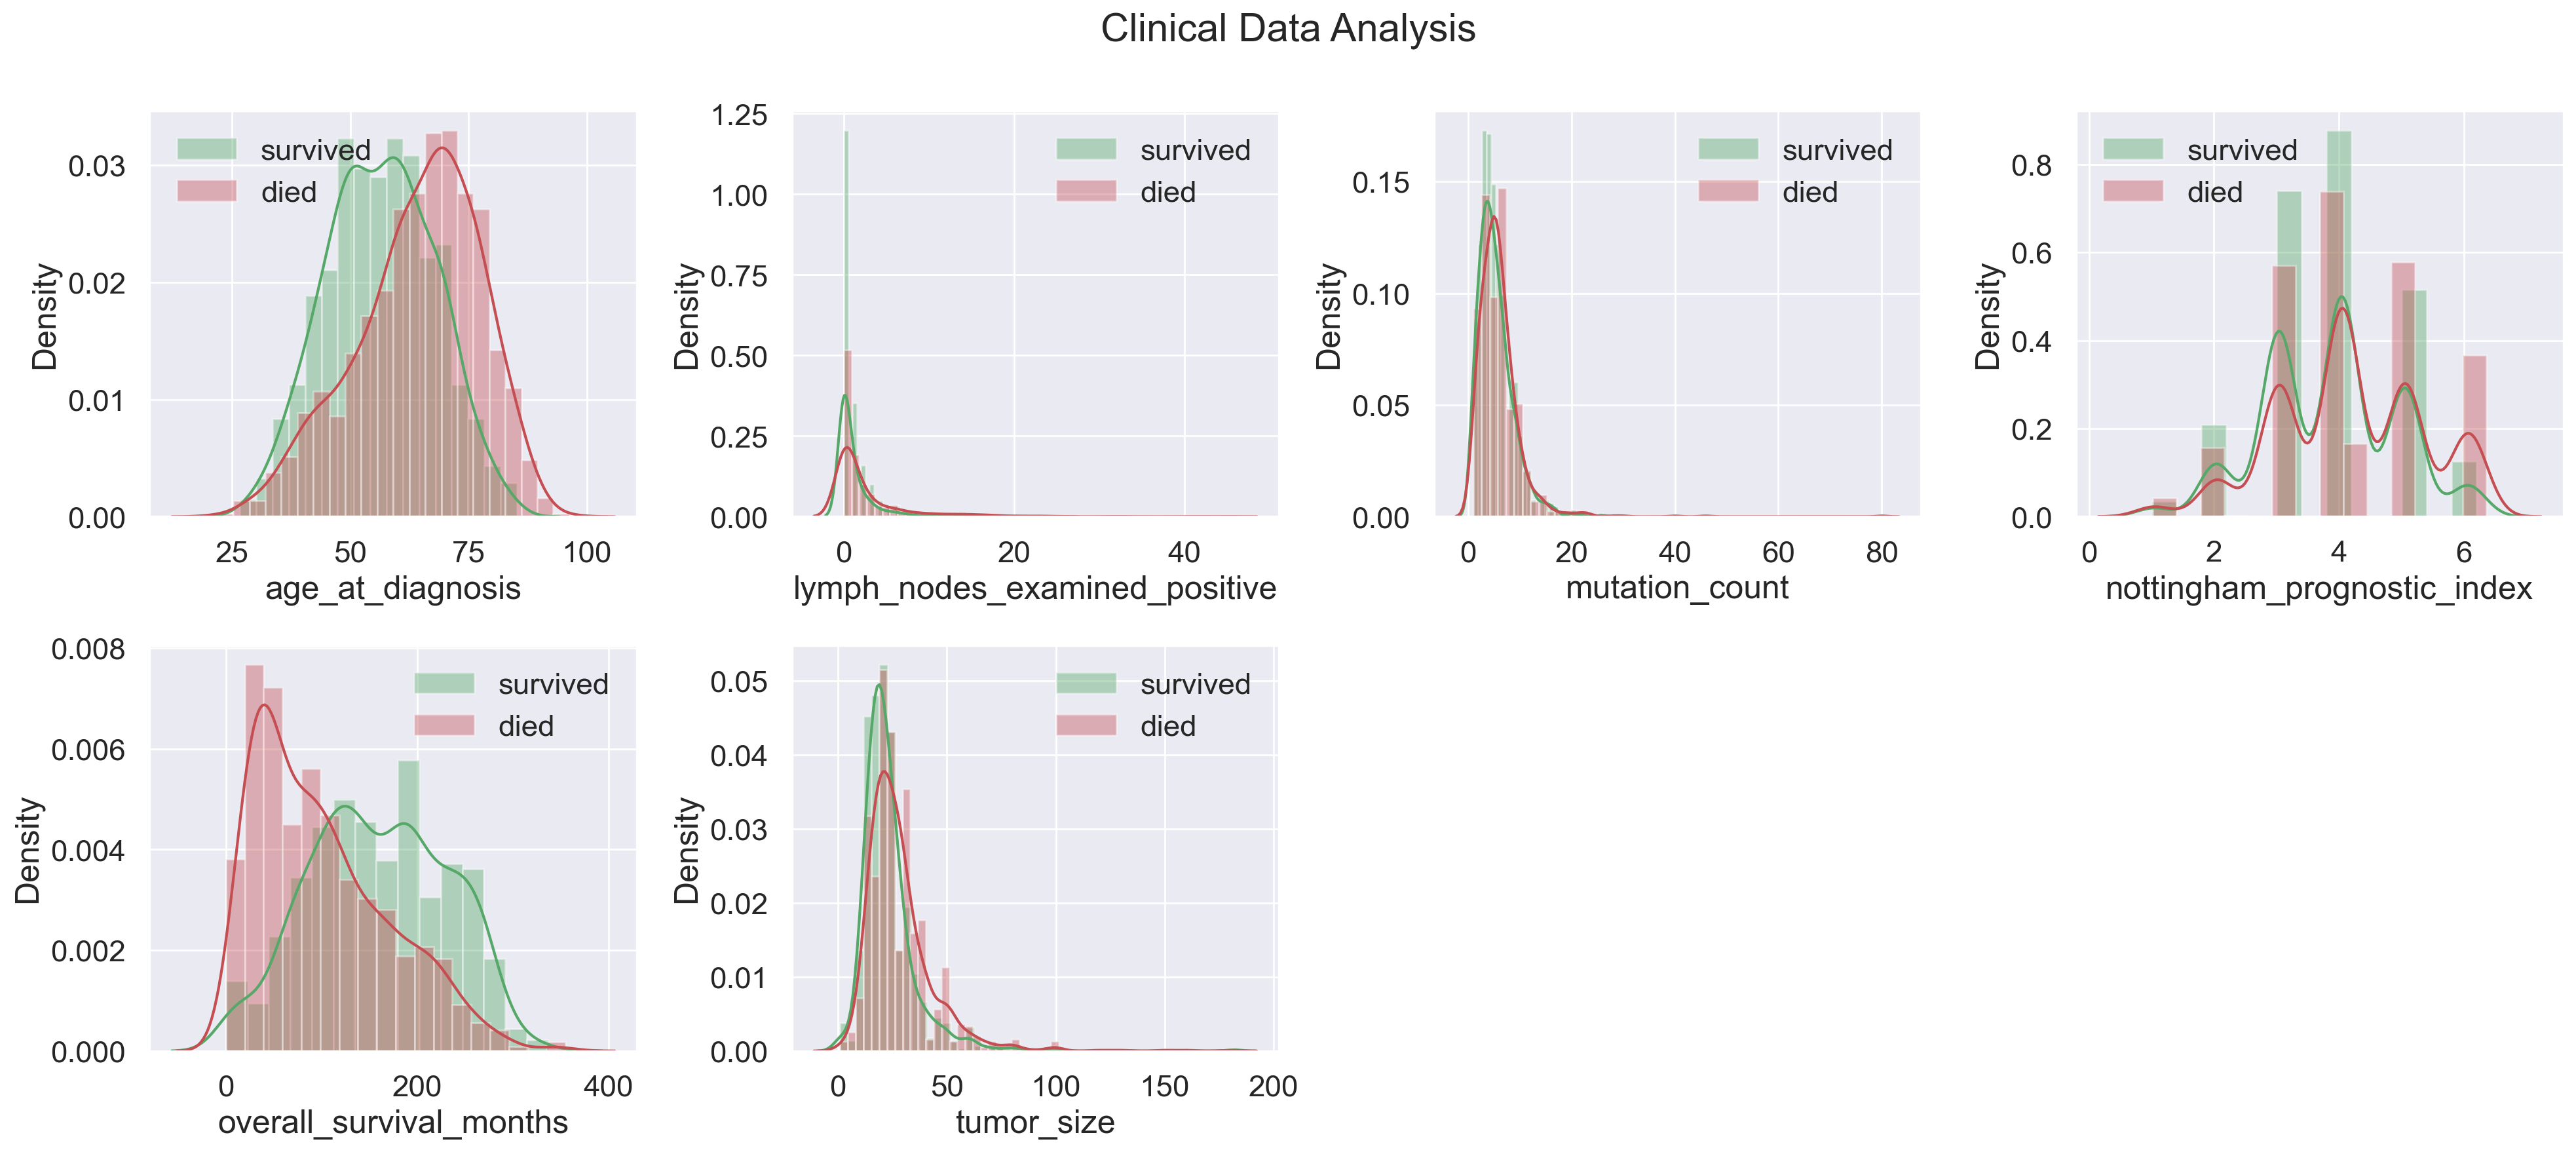

In [44]:
fig = plt.figure(figsize = (20, 25))
j = 0
num_clinical_columns= ['age_at_diagnosis', 'lymph_nodes_examined_positive','mutation_count','nottingham_prognostic_index', 'overall_survival_months', 'tumor_size' ]
for i in clinical_data[num_clinical_columns].columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(clinical_data[i][clinical_data['overall_survival']==1], color='g', label = 'survived')
    sns.distplot(clinical_data[i][clinical_data['overall_survival']==0], color='r', label = 'died')
    plt.legend(loc='best')
fig.suptitle('Clinical Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

**Visualizations Clinical Columns in the Dataframe**

In [47]:
died = clinical_data[clinical_data['overall_survival']==0]
survived = clinical_data[clinical_data['overall_survival']==1]

alive = clinical_data[clinical_data['death_from_cancer']=='Living']
died_cancer = clinical_data[clinical_data['death_from_cancer']=='Died of Disease']
died_not_cancer = clinical_data[clinical_data['death_from_cancer']=='Died of Other Causes']

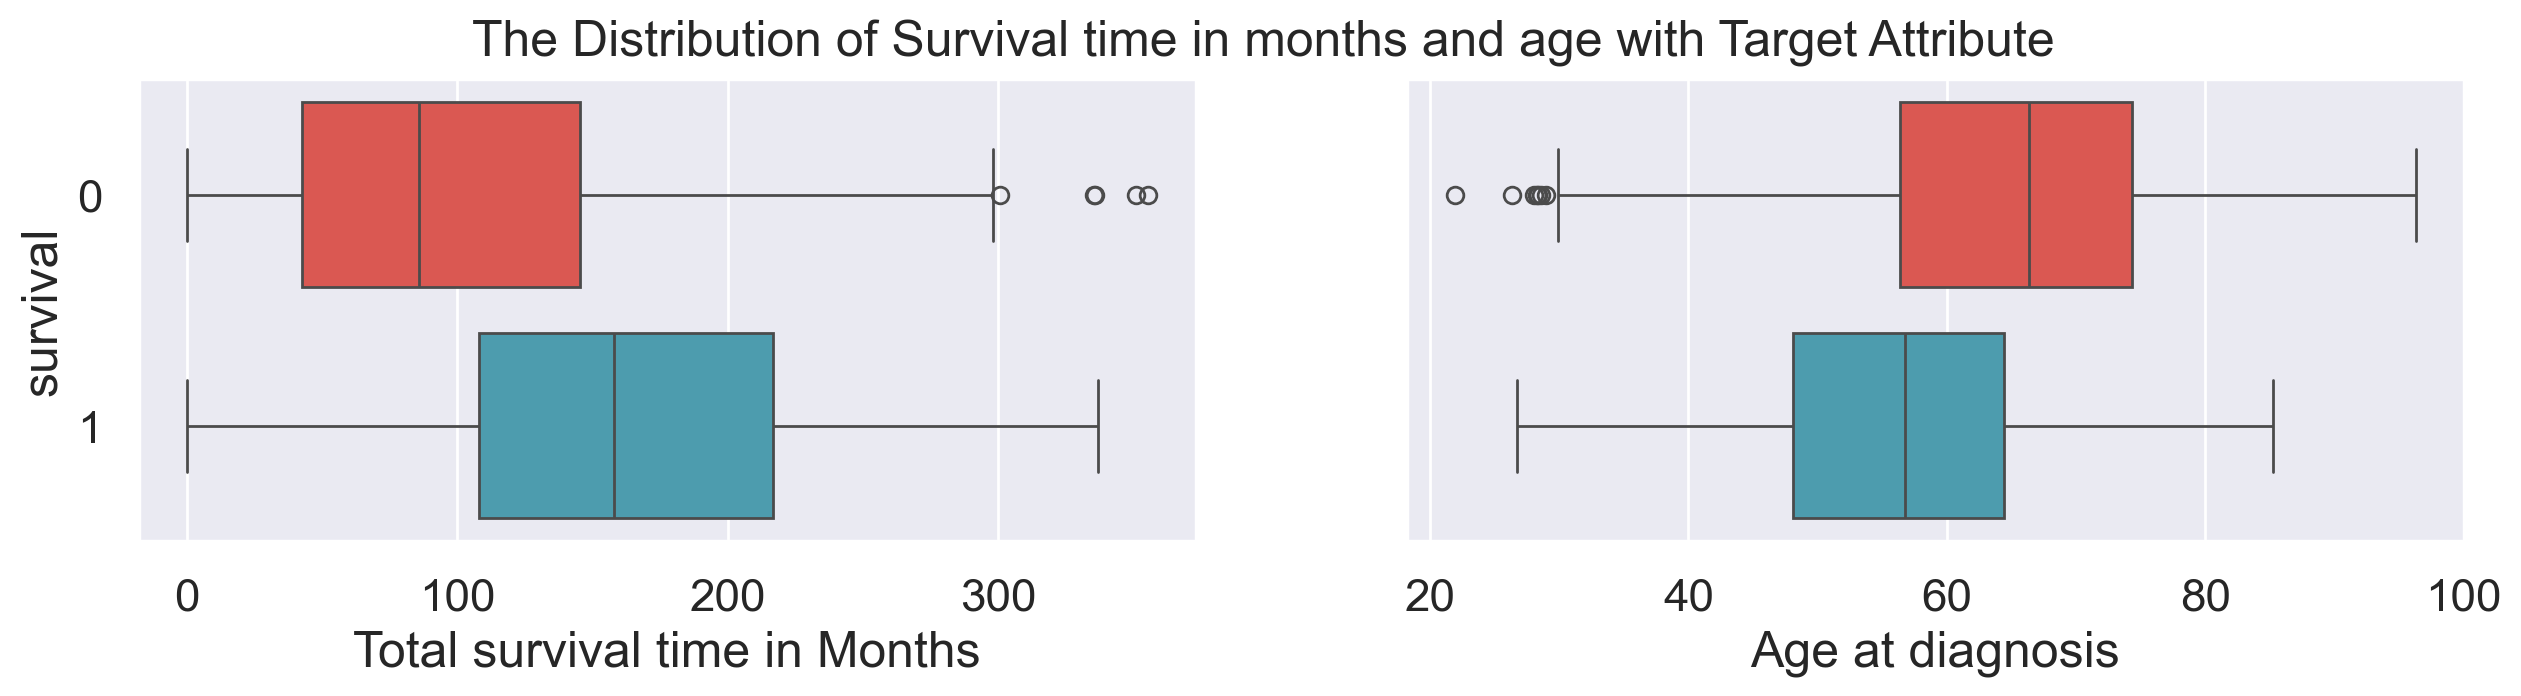

In [49]:
fig, ax = plt.subplots(ncols=2, figsize=(15,3), sharey=True)

sns.boxplot(x='overall_survival_months', y='overall_survival', orient='h', data=clinical_data, ax=ax[0], palette = two_colors, saturation=0.90)
sns.boxplot(x='age_at_diagnosis', y='overall_survival', orient='h', data=clinical_data, ax=ax[1], palette = two_colors, saturation=0.90)

fig.suptitle('The Distribution of Survival time in months and age with Target Attribute', fontsize = 18)

ax[0].set_xlabel('Total survival time in Months')
ax[0].set_ylabel('survival')
ax[1].set_xlabel('Age at diagnosis')
ax[1].set_ylabel('')

plt.show()

To compare between the two classes of patients who survived and patients who did not, we can see the difference between the two distributions in age_at_diagnosis column, as patients who were younger when diagnosed with breast cancer were more likely to survive. Also, the duration from the time of the intervention to death or to current time is longer in the patients who survive. That means that pateints are either dying early from breast cancer or surviving.

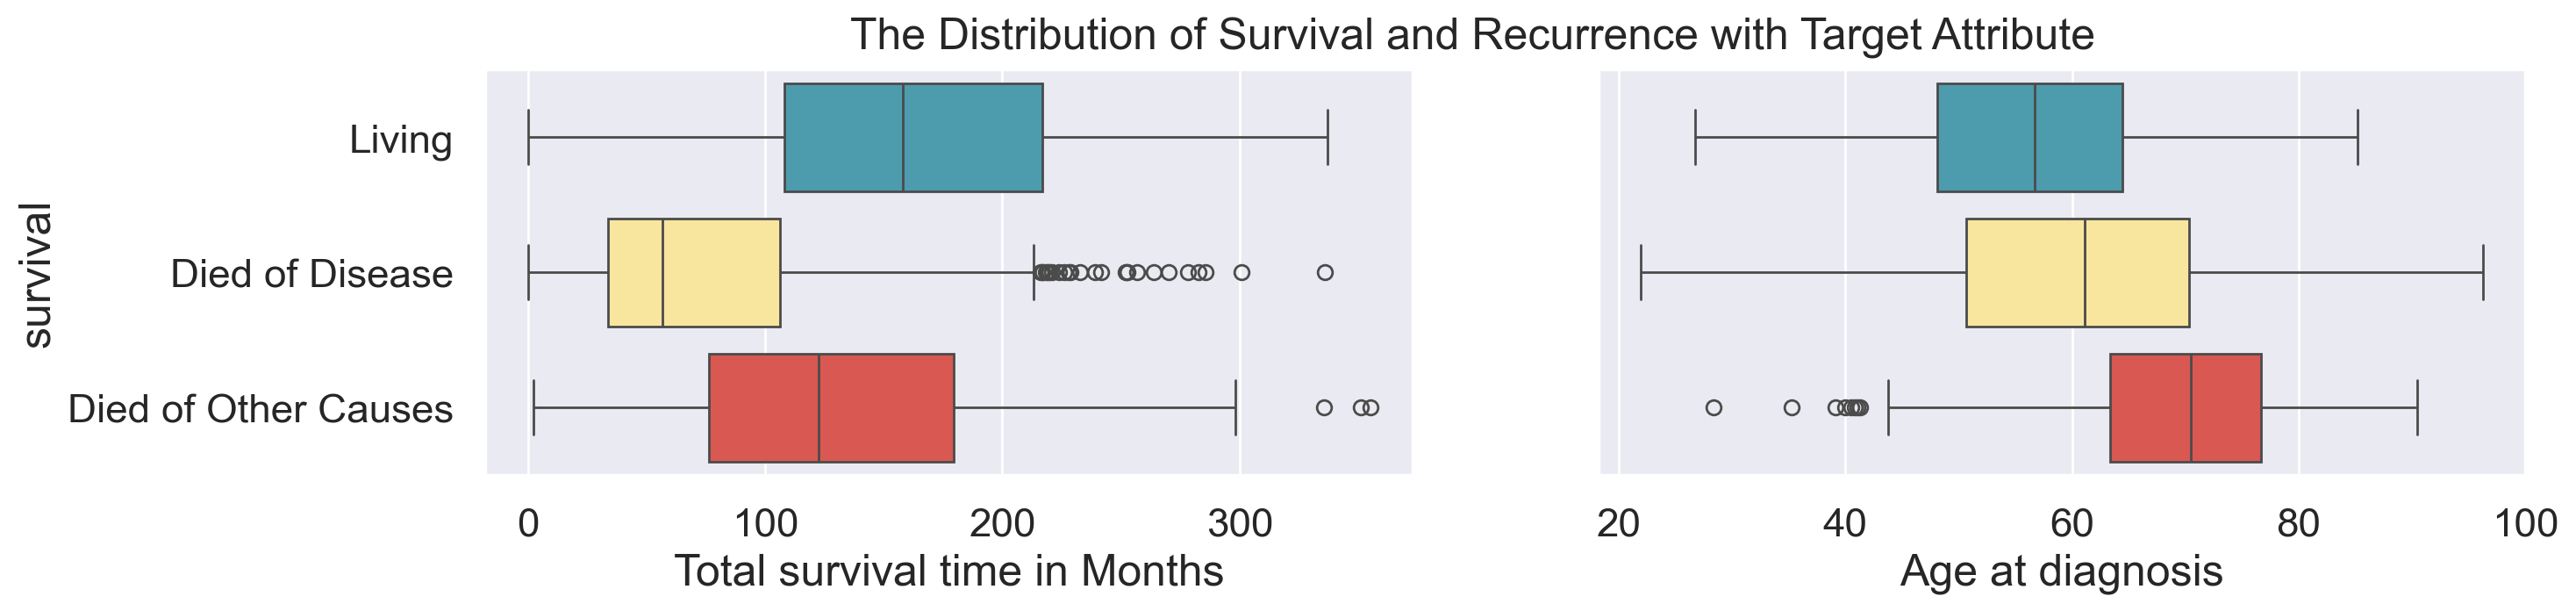

In [52]:
fig, ax = plt.subplots(ncols=2, figsize=(15,3), sharey=True)

sns.boxplot(x='overall_survival_months', y='death_from_cancer', orient='h', data=clinical_data, ax=ax[0], palette = three_colors, saturation=0.90)
sns.boxplot(x='age_at_diagnosis', y='death_from_cancer', orient='h', data=clinical_data, ax=ax[1], palette = three_colors, saturation=0.90)

fig.suptitle('The Distribution of Survival and Recurrence with Target Attribute', fontsize = 18)

ax[0].set_xlabel('Total survival time in Months')
ax[0].set_ylabel('survival')
ax[1].set_xlabel('Age at diagnosis')
ax[1].set_ylabel('')

plt.show()

The variable 'death_from_cancer' shows us if the patient is alive or died from cancer or its complications or died of other causes. From the distribution of the three classes, we can see that the median of the survival time in months of patients who died from breast cancer is low compared to the other two classes, and its distribution os right-skewed with a lot of outliers. Also, patients who died from other causes than cancer tend to be older than the other two classes. The distribution of it is left-skewed with some younger outliers.

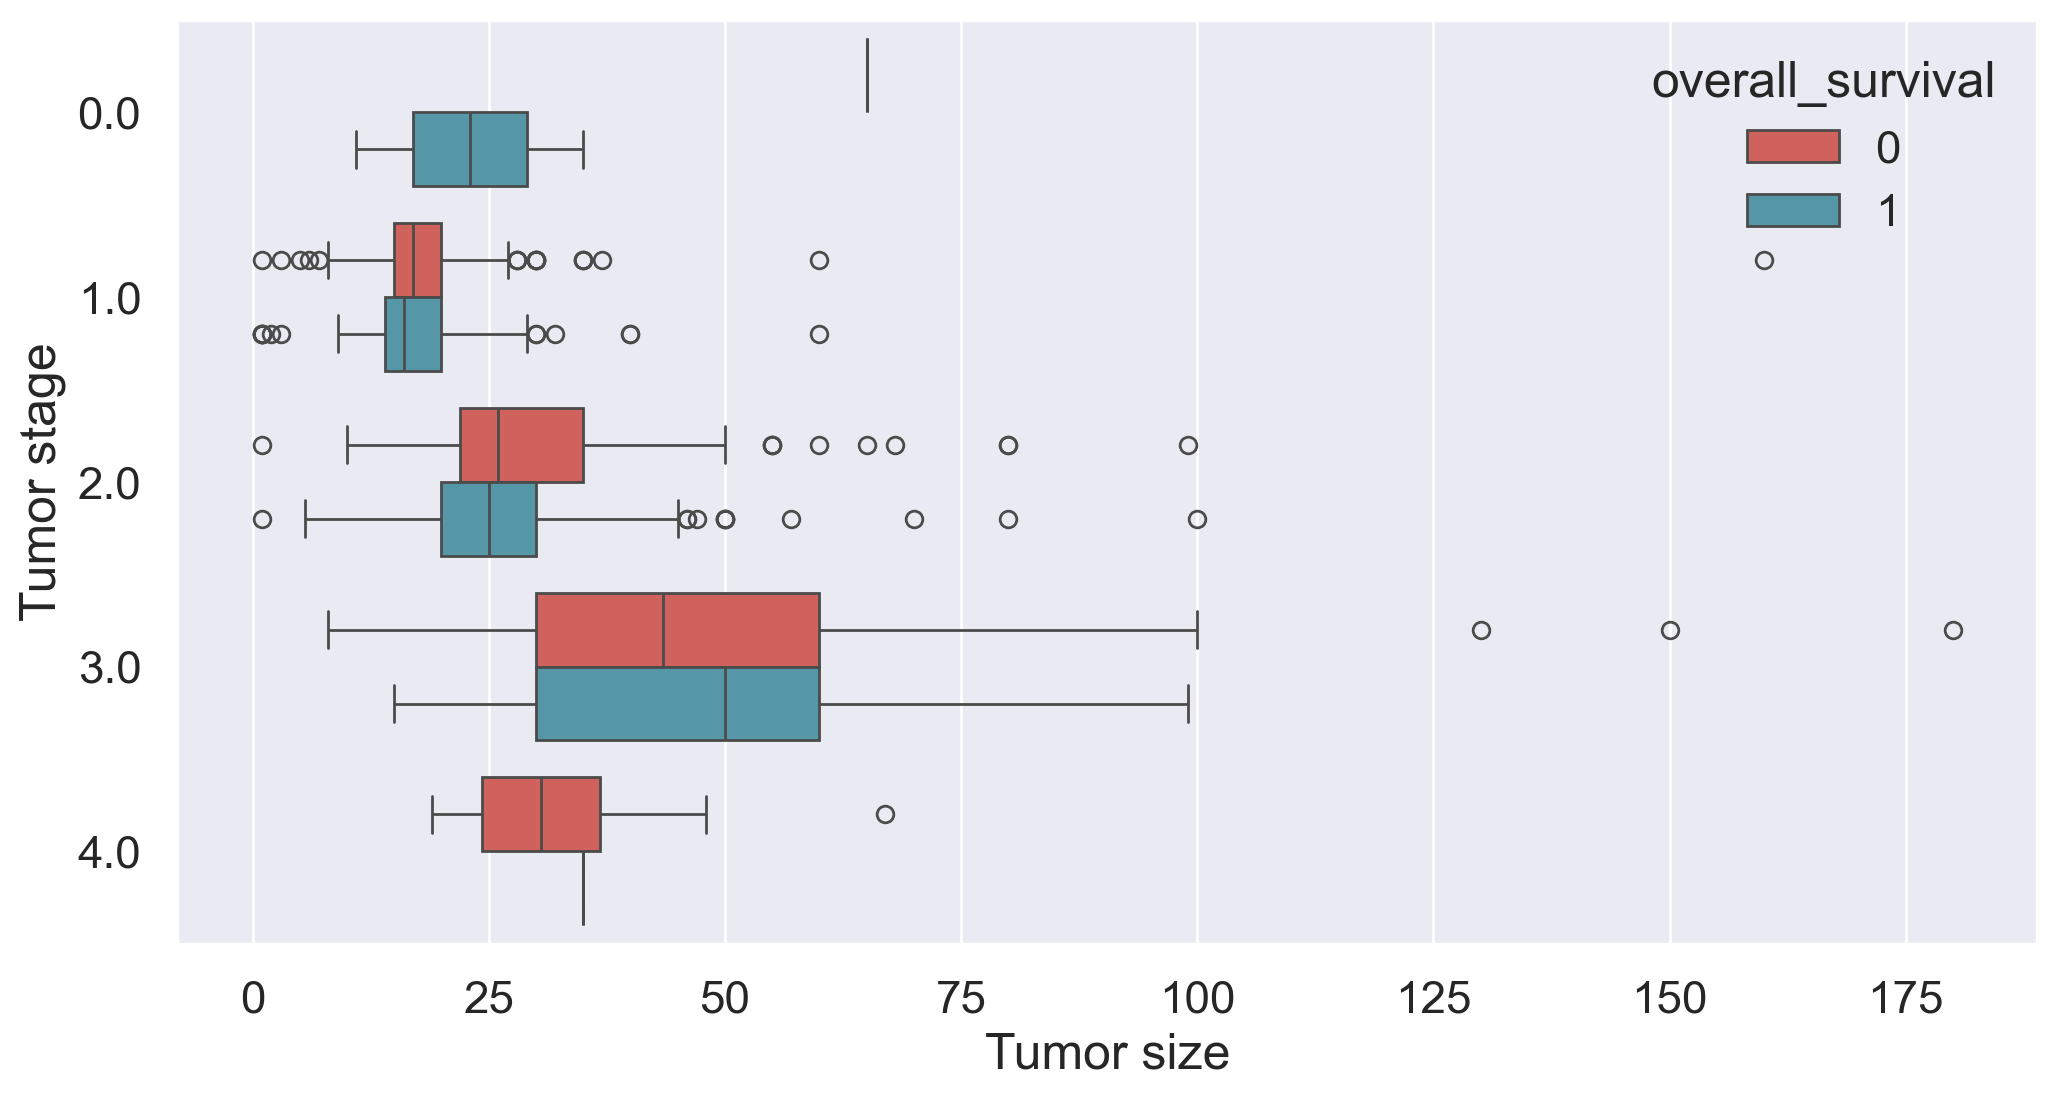

In [55]:
ig, ax = plt.subplots( figsize=(12, 6))
ax = sns.boxplot(x ='tumor_size', y ='tumor_stage',  data = clinical_data, orient='h', hue='overall_survival', palette=two_colors)

ax.set_ylabel('Tumor stage')
ax.set_xlabel('Tumor size')
fig.suptitle('Tumor stage vs. Tumor size and overall_survival', fontsize=20)

#legend = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

linkcode
As the Tumer stage increases the tumor size increases as well. Also, if lower tumor stages the probability of survival is higher than when the patient reaches the fourth stage

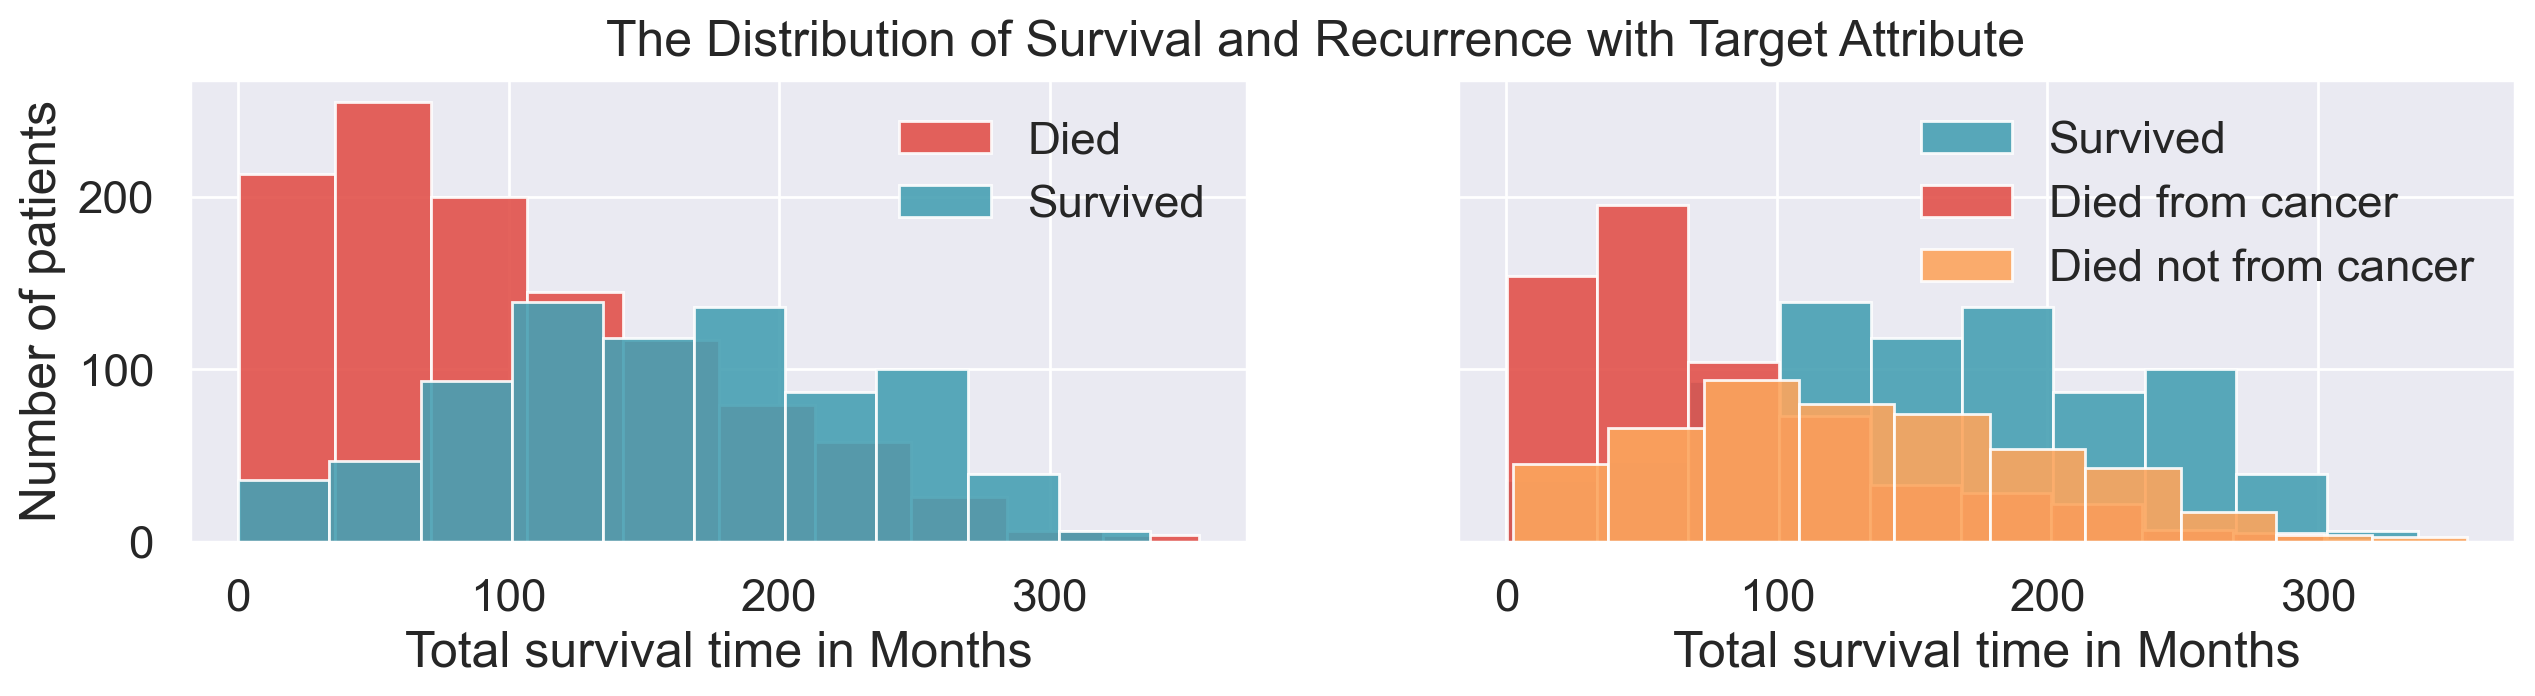

In [58]:
fig, ax = plt.subplots(ncols=2, figsize=(15,3), sharey=True)

fig.suptitle('The Distribution of Survival and Recurrence with Target Attribute', fontsize = 18)

ax[0].hist(died['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[0], label='Died')
ax[0].hist(survived['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[0].legend()

ax[1].hist(alive['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[1].hist(died_cancer['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[0], label='Died from cancer')
ax[1].hist(died_not_cancer['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[1], label='Died not from cancer')
ax[1].legend()

ax[0].set_xlabel('Total survival time in Months')
ax[0].set_ylabel('Number of patients')
ax[1].set_xlabel('Total survival time in Months')
ax[1].set_ylabel('')

plt.show()

linkcode
When the total survival time in months increases, the probability of survival increases as well, and the probability of dying from reasons other than cancer decrease with time slightly.

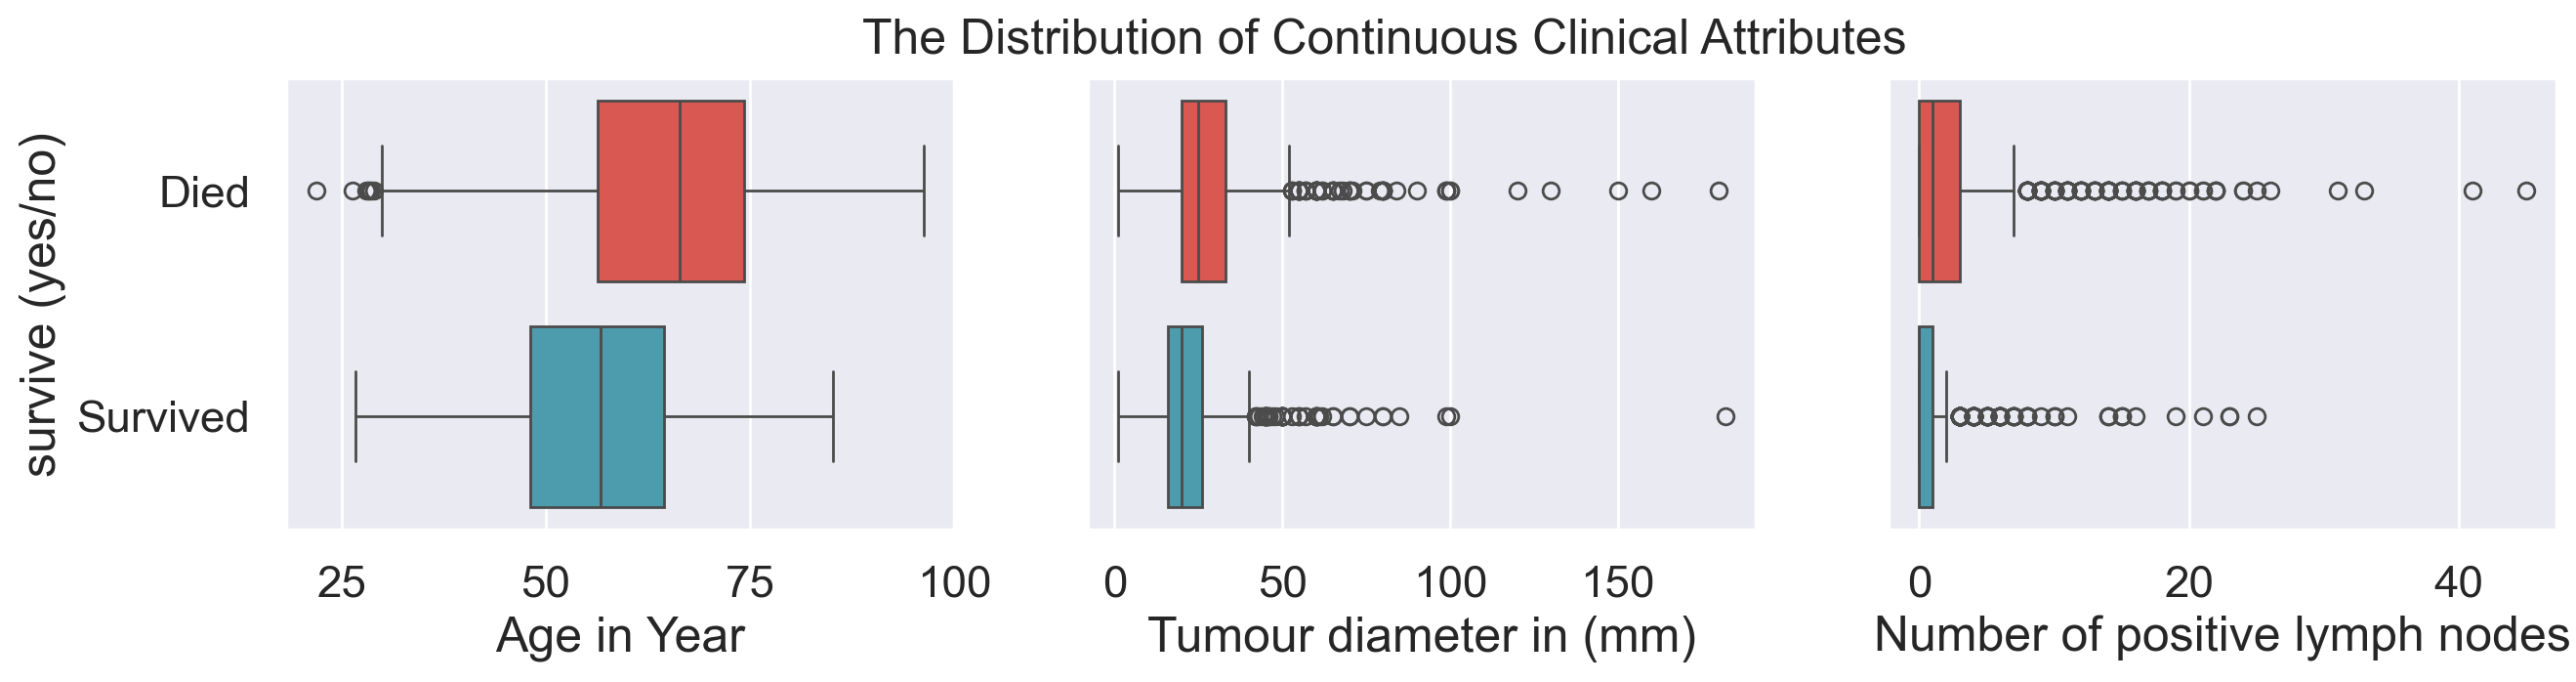

In [61]:
fig, ax = plt.subplots(ncols=3, figsize=(15,3), sharey=True)

sns.boxplot(x='age_at_diagnosis', y='overall_survival', orient='h', data=clinical_data, ax=ax[0], palette = two_colors, saturation=0.90)
sns.boxplot(x='tumor_size', y='overall_survival', orient='h', data=clinical_data, ax=ax[1], palette = two_colors, saturation=0.90)
sns.boxplot(x='lymph_nodes_examined_positive', y='overall_survival', orient='h', data=clinical_data, ax=ax[2], palette = two_colors, saturation=0.90)

fig.suptitle('The Distribution of Continuous Clinical Attributes', fontsize = 18)
plt.yticks([-0.5, 0, 1, 1.5], ['','Died', 'Survived',''])
ax[0].set_xlabel('Age in Year')
ax[0].set_ylabel('survive (yes/no)')

ax[1].set_xlabel('Tumour diameter in (mm)')
ax[1].set_ylabel('')

ax[2].set_xlabel('Number of positive lymph nodes')
ax[2].set_ylabel('')

plt.show()

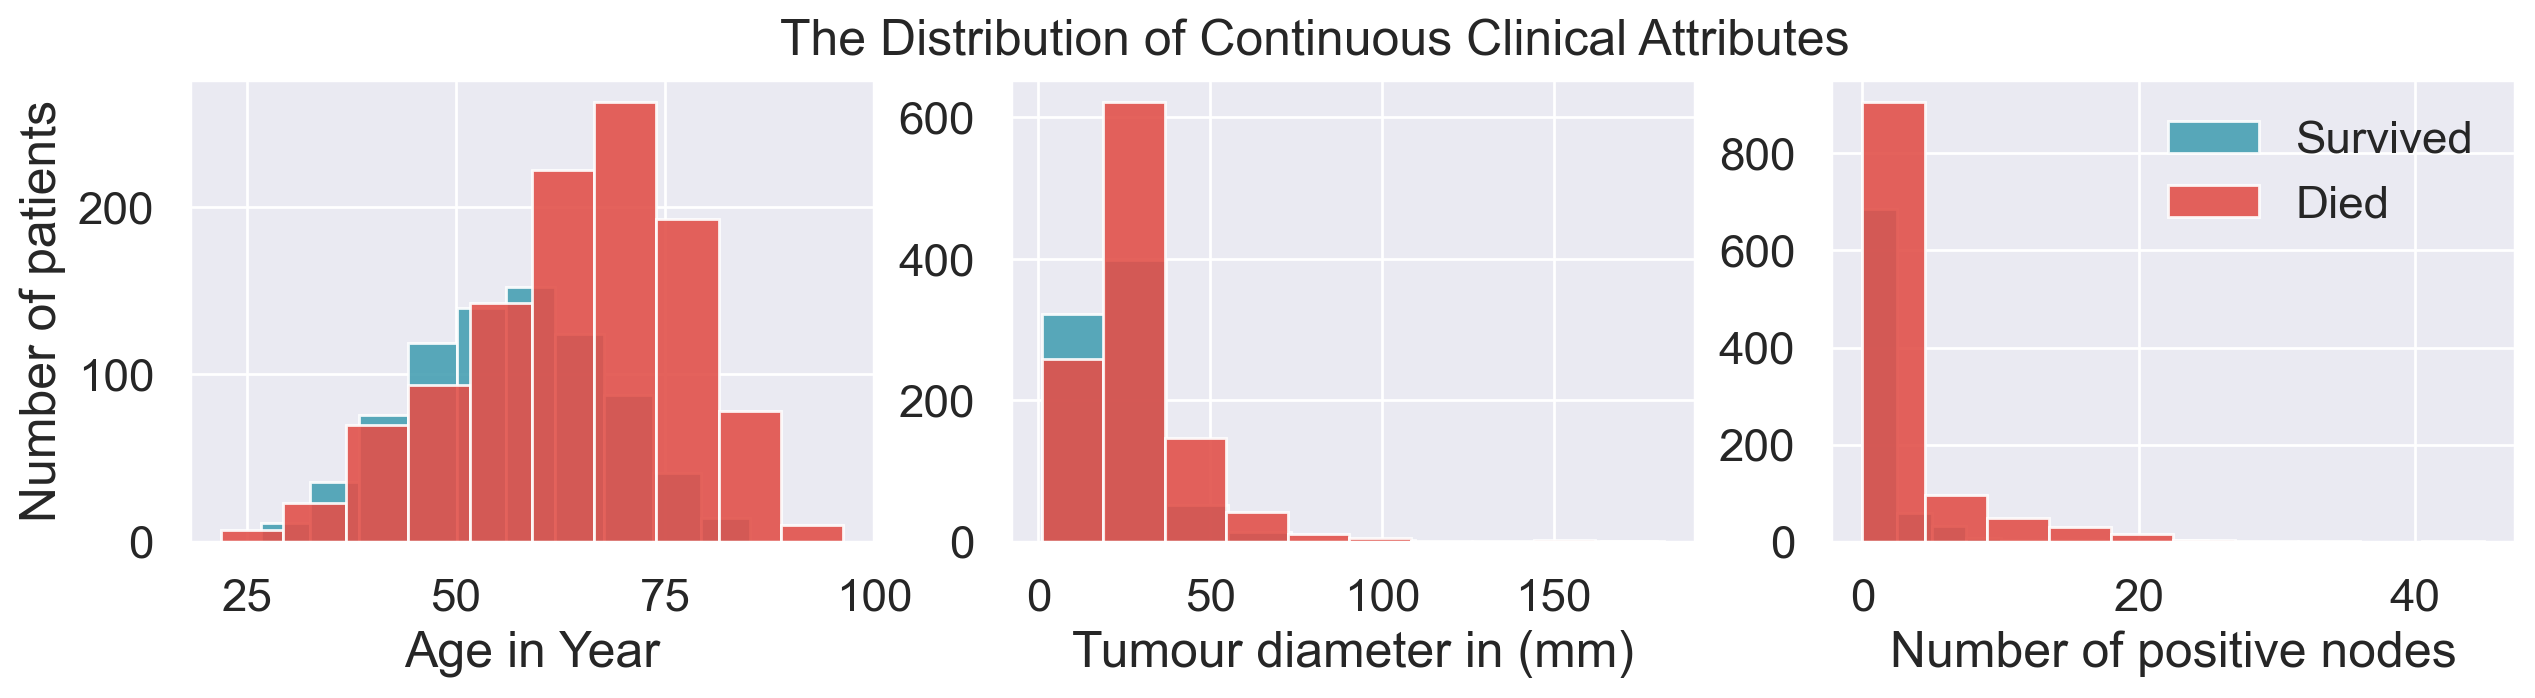

In [63]:
fig, ax = plt.subplots(ncols=3, figsize=(15,3))
fig.suptitle('The Distribution of Continuous Clinical Attributes', fontsize = 18)

ax[0].hist(survived['age_at_diagnosis'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[0].hist(died['age_at_diagnosis'], alpha=0.9, color=sns.color_palette(color)[0], label='Died')
#ax[0].legend()

ax[1].hist(survived['tumor_size'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[1].hist(died['tumor_size'], alpha=0.9, color=sns.color_palette(color)[0], label='Died')
#ax[1].legend()

ax[2].hist(survived['lymph_nodes_examined_positive'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[2].hist(died['lymph_nodes_examined_positive'], alpha=0.9, color=sns.color_palette(color)[0], label='Died')
ax[2].legend()

ax[0].set_xlabel('Age in Year')
ax[0].set_ylabel('Number of patients')
ax[1].set_xlabel('Tumour diameter in (mm)')
ax[1].set_ylabel('')
ax[2].set_xlabel('Number of positive nodes')
ax[2].set_ylabel('')

plt.show()

The median of tumor size and the number of positive lymph nodes is lower in the survived class than the died class.

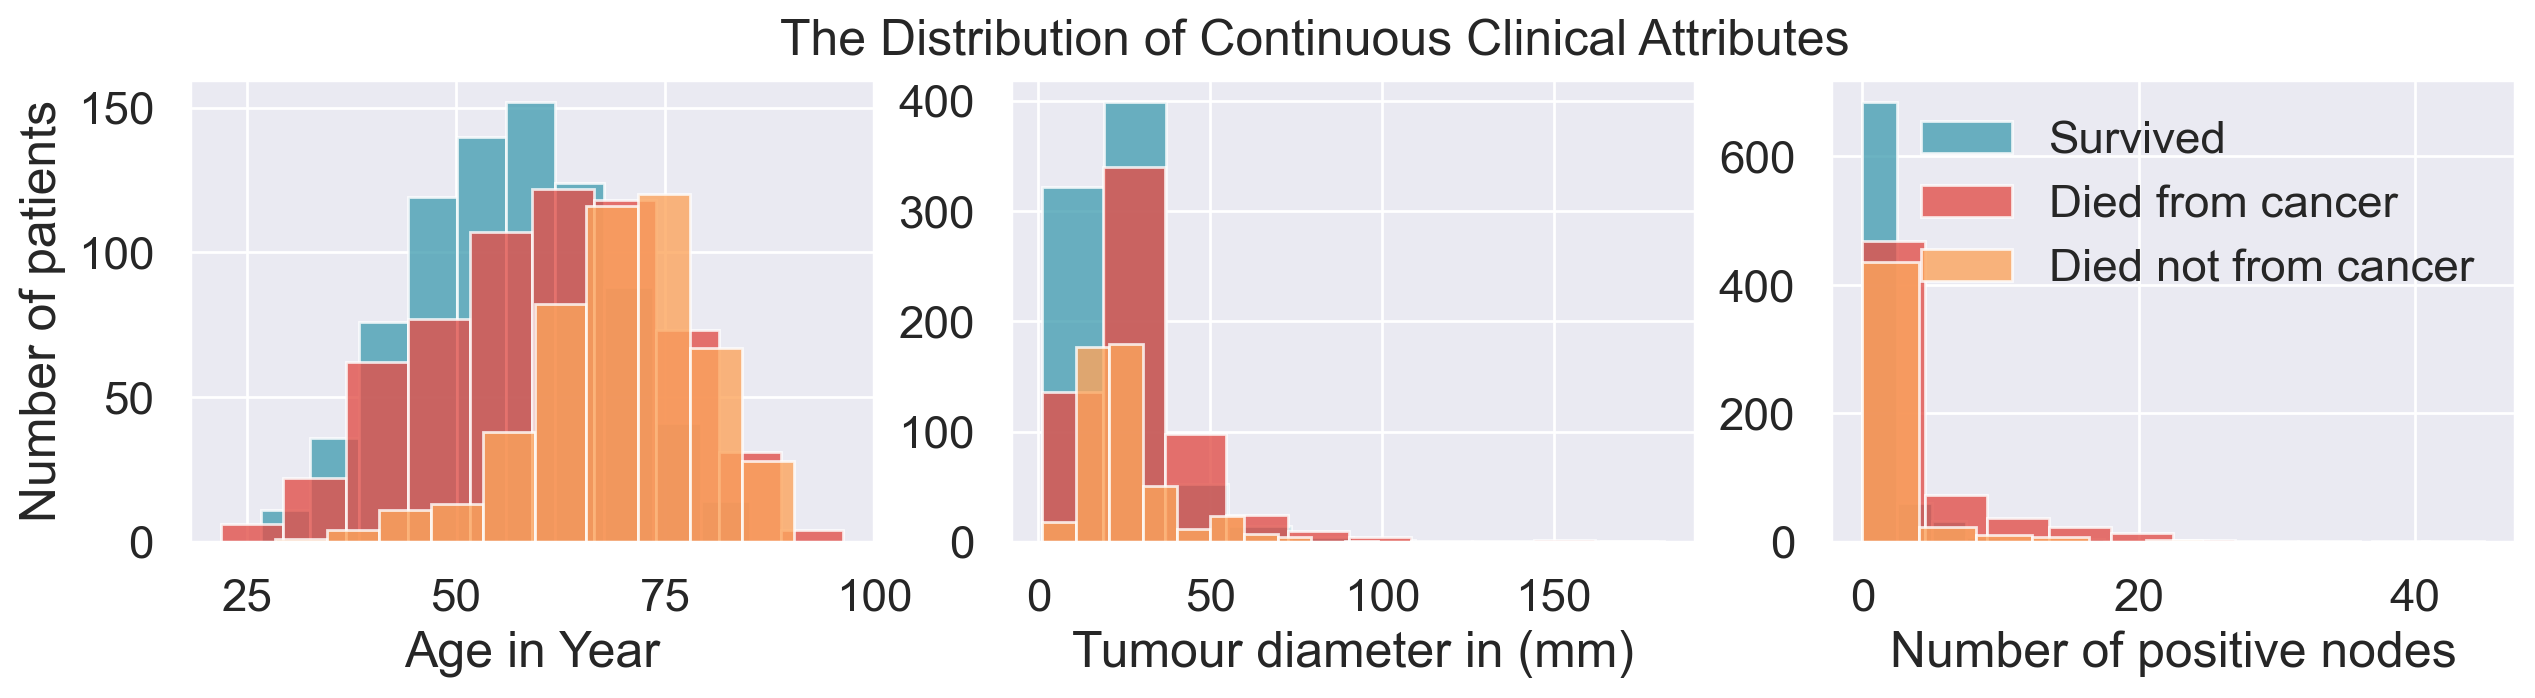

In [66]:
fig, ax = plt.subplots(ncols=3, figsize=(15,3))
fig.suptitle('The Distribution of Continuous Clinical Attributes', fontsize = 18)

ax[0].hist(alive['age_at_diagnosis'], alpha=0.8, color=sns.color_palette(color)[5], label='Survived')
ax[0].hist(died_cancer['age_at_diagnosis'], alpha=0.8, color=sns.color_palette(color)[0], label='Died from cancer')
ax[0].hist(died_not_cancer['age_at_diagnosis'], alpha=0.8, color=sns.color_palette(color)[1], label='Died not from cancer')
#ax[0].legend()

ax[1].hist(alive['tumor_size'], alpha=0.8, color=sns.color_palette(color)[5], label='Survived')
ax[1].hist(died_cancer['tumor_size'], alpha=0.8, color=sns.color_palette(color)[0], label='Died from cancer')
ax[1].hist(died_not_cancer['tumor_size'], alpha=0.8, color=sns.color_palette(color)[1], label='Died not from cancer')
#ax[1].legend()

ax[2].hist(survived['lymph_nodes_examined_positive'], alpha=0.8, color=sns.color_palette(color)[5], label='Survived')
ax[2].hist(died_cancer['lymph_nodes_examined_positive'], alpha=0.8, color=sns.color_palette(color)[0], label='Died from cancer')
ax[2].hist(died_not_cancer['lymph_nodes_examined_positive'], alpha=0.8, color=sns.color_palette(color)[1], label='Died not from cancer')
ax[2].legend()

ax[0].set_xlabel('Age in Year')
ax[0].set_ylabel('Number of patients')
ax[1].set_xlabel('Tumour diameter in (mm)')
ax[1].set_ylabel('')
ax[2].set_xlabel('Number of positive nodes')
ax[2].set_ylabel('')

plt.show()

TypeError: _compute_colors() takes 3 positional arguments but 6 were given

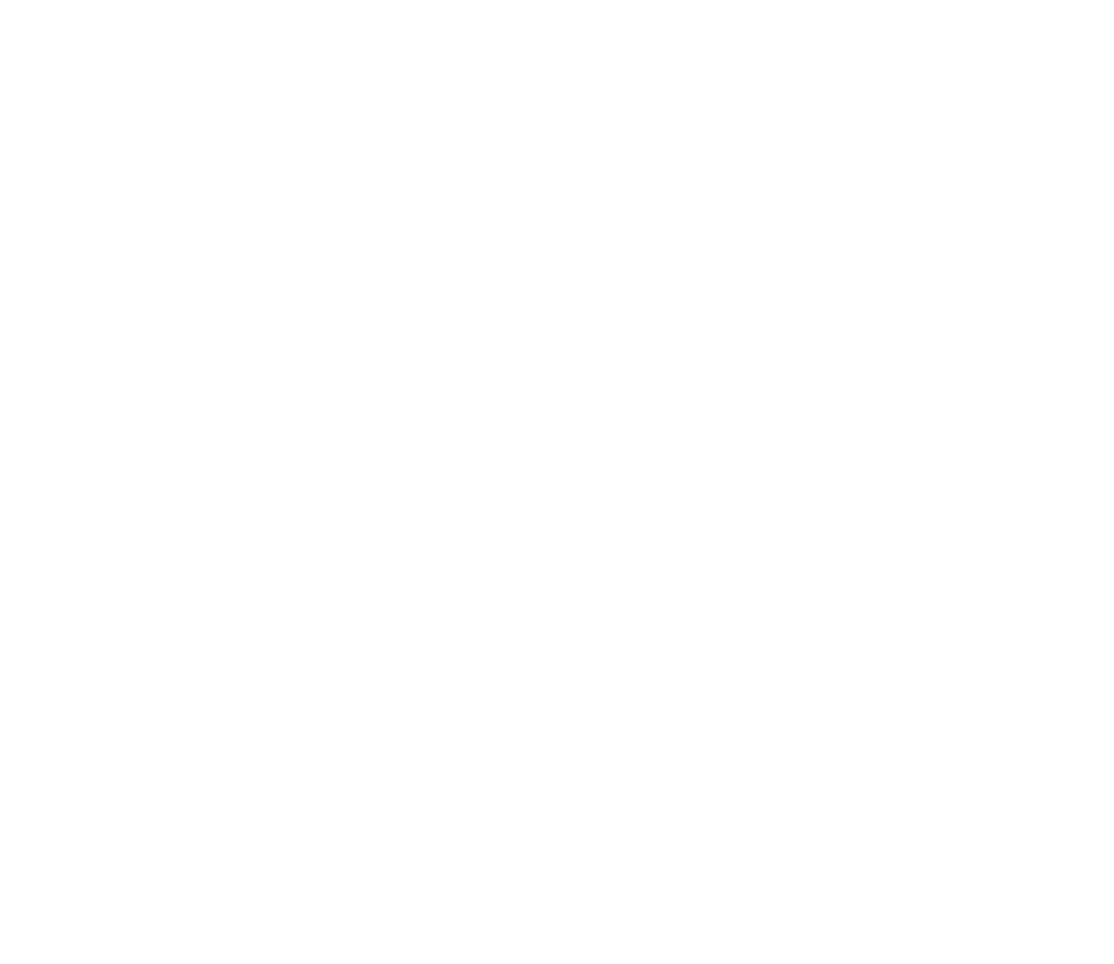

In [68]:
#visualise the treatments and proportion death for other groups using venn diagram

#first create subsets for different combinations of treatments
chemo = clinical_data[(clinical_data["chemotherapy"]==True) & (clinical_data["radio_therapy"]==False) & (clinical_data["hormone_therapy"]==False)]
radio = clinical_data[(clinical_data["chemotherapy"]==False) & (clinical_data["radio_therapy"]==True) & (clinical_data["hormone_therapy"]==False)]
hormonal = clinical_data[(clinical_data["chemotherapy"]==False) & (clinical_data["radio_therapy"]==False) & (clinical_data["hormone_therapy"]==True)]
chemo_radio = clinical_data[(clinical_data["chemotherapy"]==True) & (clinical_data["radio_therapy"]==True) & (clinical_data["hormone_therapy"]==False)]
radio_hormonal = clinical_data[(clinical_data["chemotherapy"]==False) & (clinical_data["radio_therapy"]==True) & (clinical_data["hormone_therapy"]==True)]
hormonal_chemo = clinical_data[(clinical_data["chemotherapy"]==True) & (clinical_data["radio_therapy"]==False) & (clinical_data["hormone_therapy"]==True)]
all_3 = clinical_data[(clinical_data["chemotherapy"]==True) & (clinical_data["radio_therapy"]==True) & (clinical_data["hormone_therapy"]==True)]

#calculate number of people for each combination and proportion death
df_subsets = [chemo, radio, hormonal, chemo_radio, radio_hormonal, hormonal_chemo, all_3]
sizes=[]
proportiondeath=[]
for dataframe in df_subsets:
    sizes.append(np.shape(dataframe)[0])
    proportiondeath.append(np.mean(dataframe["overall_survival"]))

#set size of circles relative to size of each subset (where possible)
#set gradient of blue according to proportion of death in subset calculated above
fig, ax = plt.subplots(figsize=(8,6))
v = venn3(subsets=sizes, set_labels=("Chemo", "Radio ", "Hormonal"), ax=ax, alpha=0.6, set_colors= sns.color_palette(color))

for text in v.set_labels:
    text.set_fontsize(14)
    
ax.set_title("Patients by treatment group", size=20)
plt.show()

linkcode
Venn diagram for the three different treatments for breast cancer and the distribution of patients amongst them. we can see that most patients either have chemo and hormonal therapy or chemo and radio therapy. there is a group that is not shown here in the diagram, which are the patients that did not receive any of the three treatments. they were 289 patients and their survival rate was slightly lower than the rest of patients.

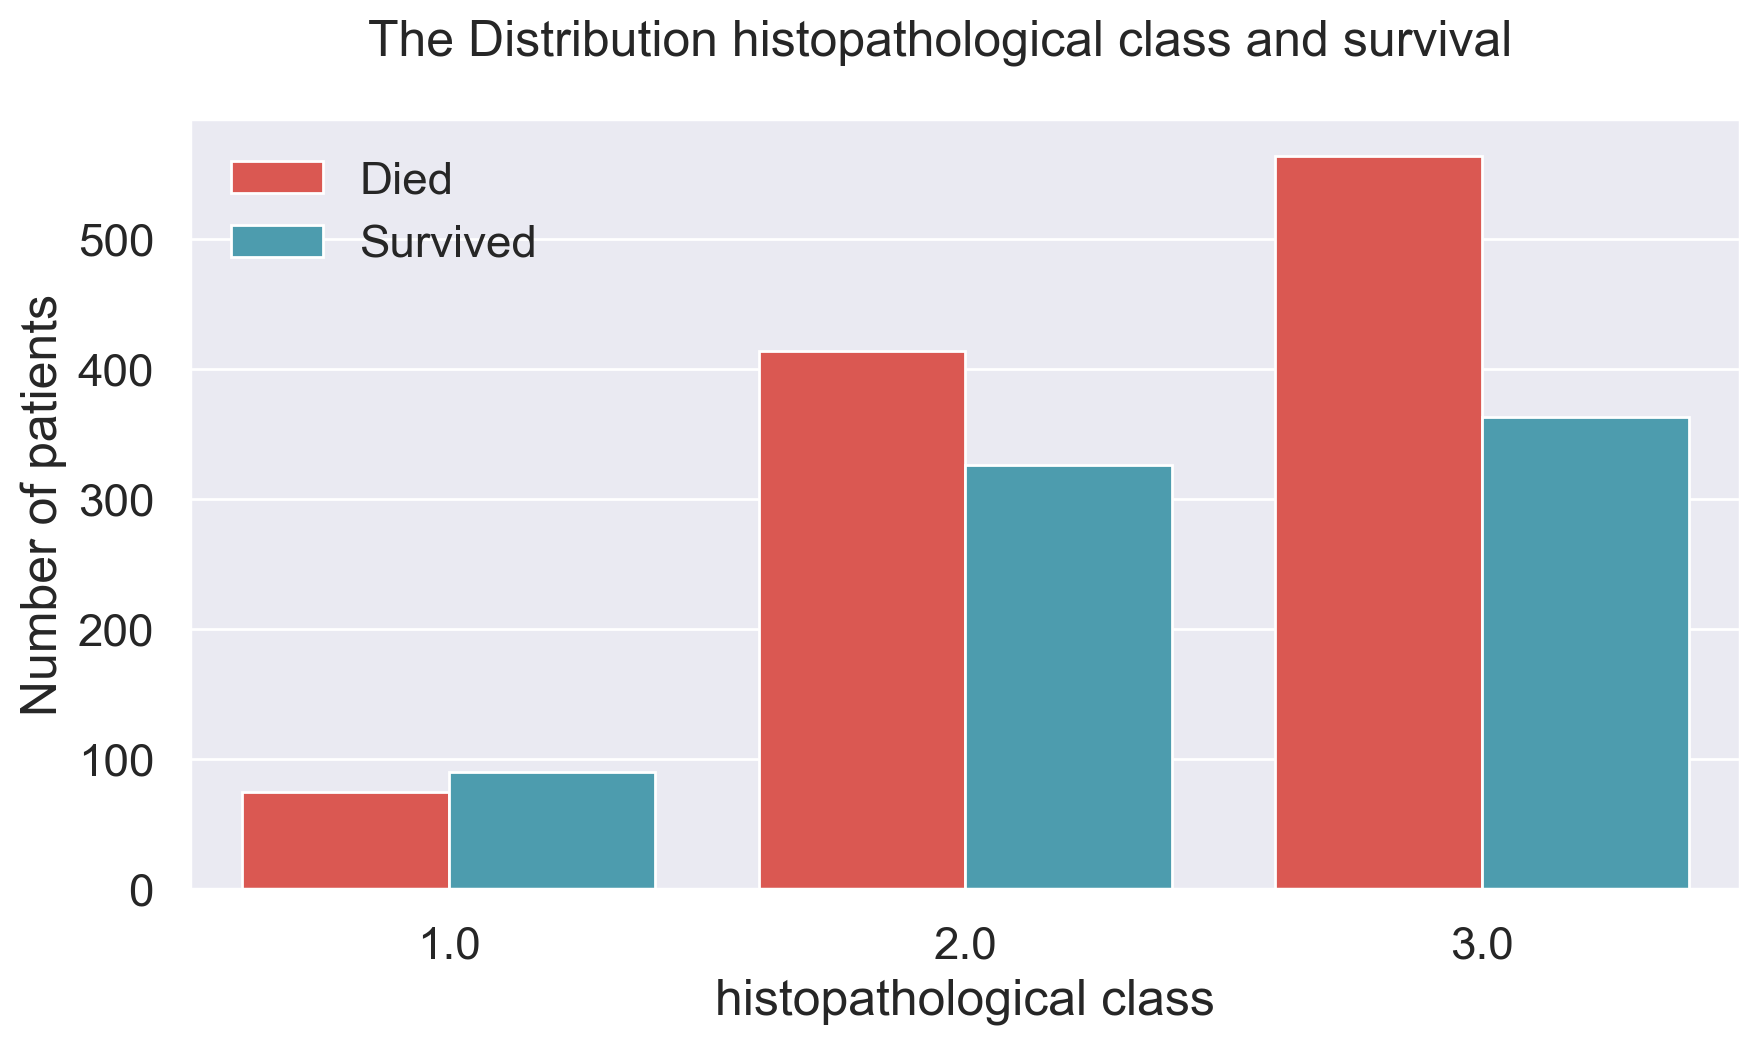

In [70]:
fig, ax = plt.subplots( figsize=(10,5))
fig.suptitle('The Distribution histopathological class and survival', fontsize = 18)

sns.countplot(x='neoplasm_histologic_grade', hue='overall_survival' ,data = clinical_data, palette=two_colors , ax=ax, saturation=0.90)
ax.legend([ 'Died', 'Survived'])

ax.set_xlabel('histopathological class')
ax.set_ylabel('Number of patients')

plt.show()

**Visualize Correlation of between the Clinical Attributes**

In [73]:
print(no_id_clinical_data.head())
print(no_id_clinical_data.dtypes)


NameError: name 'no_id_clinical_data' is not defined

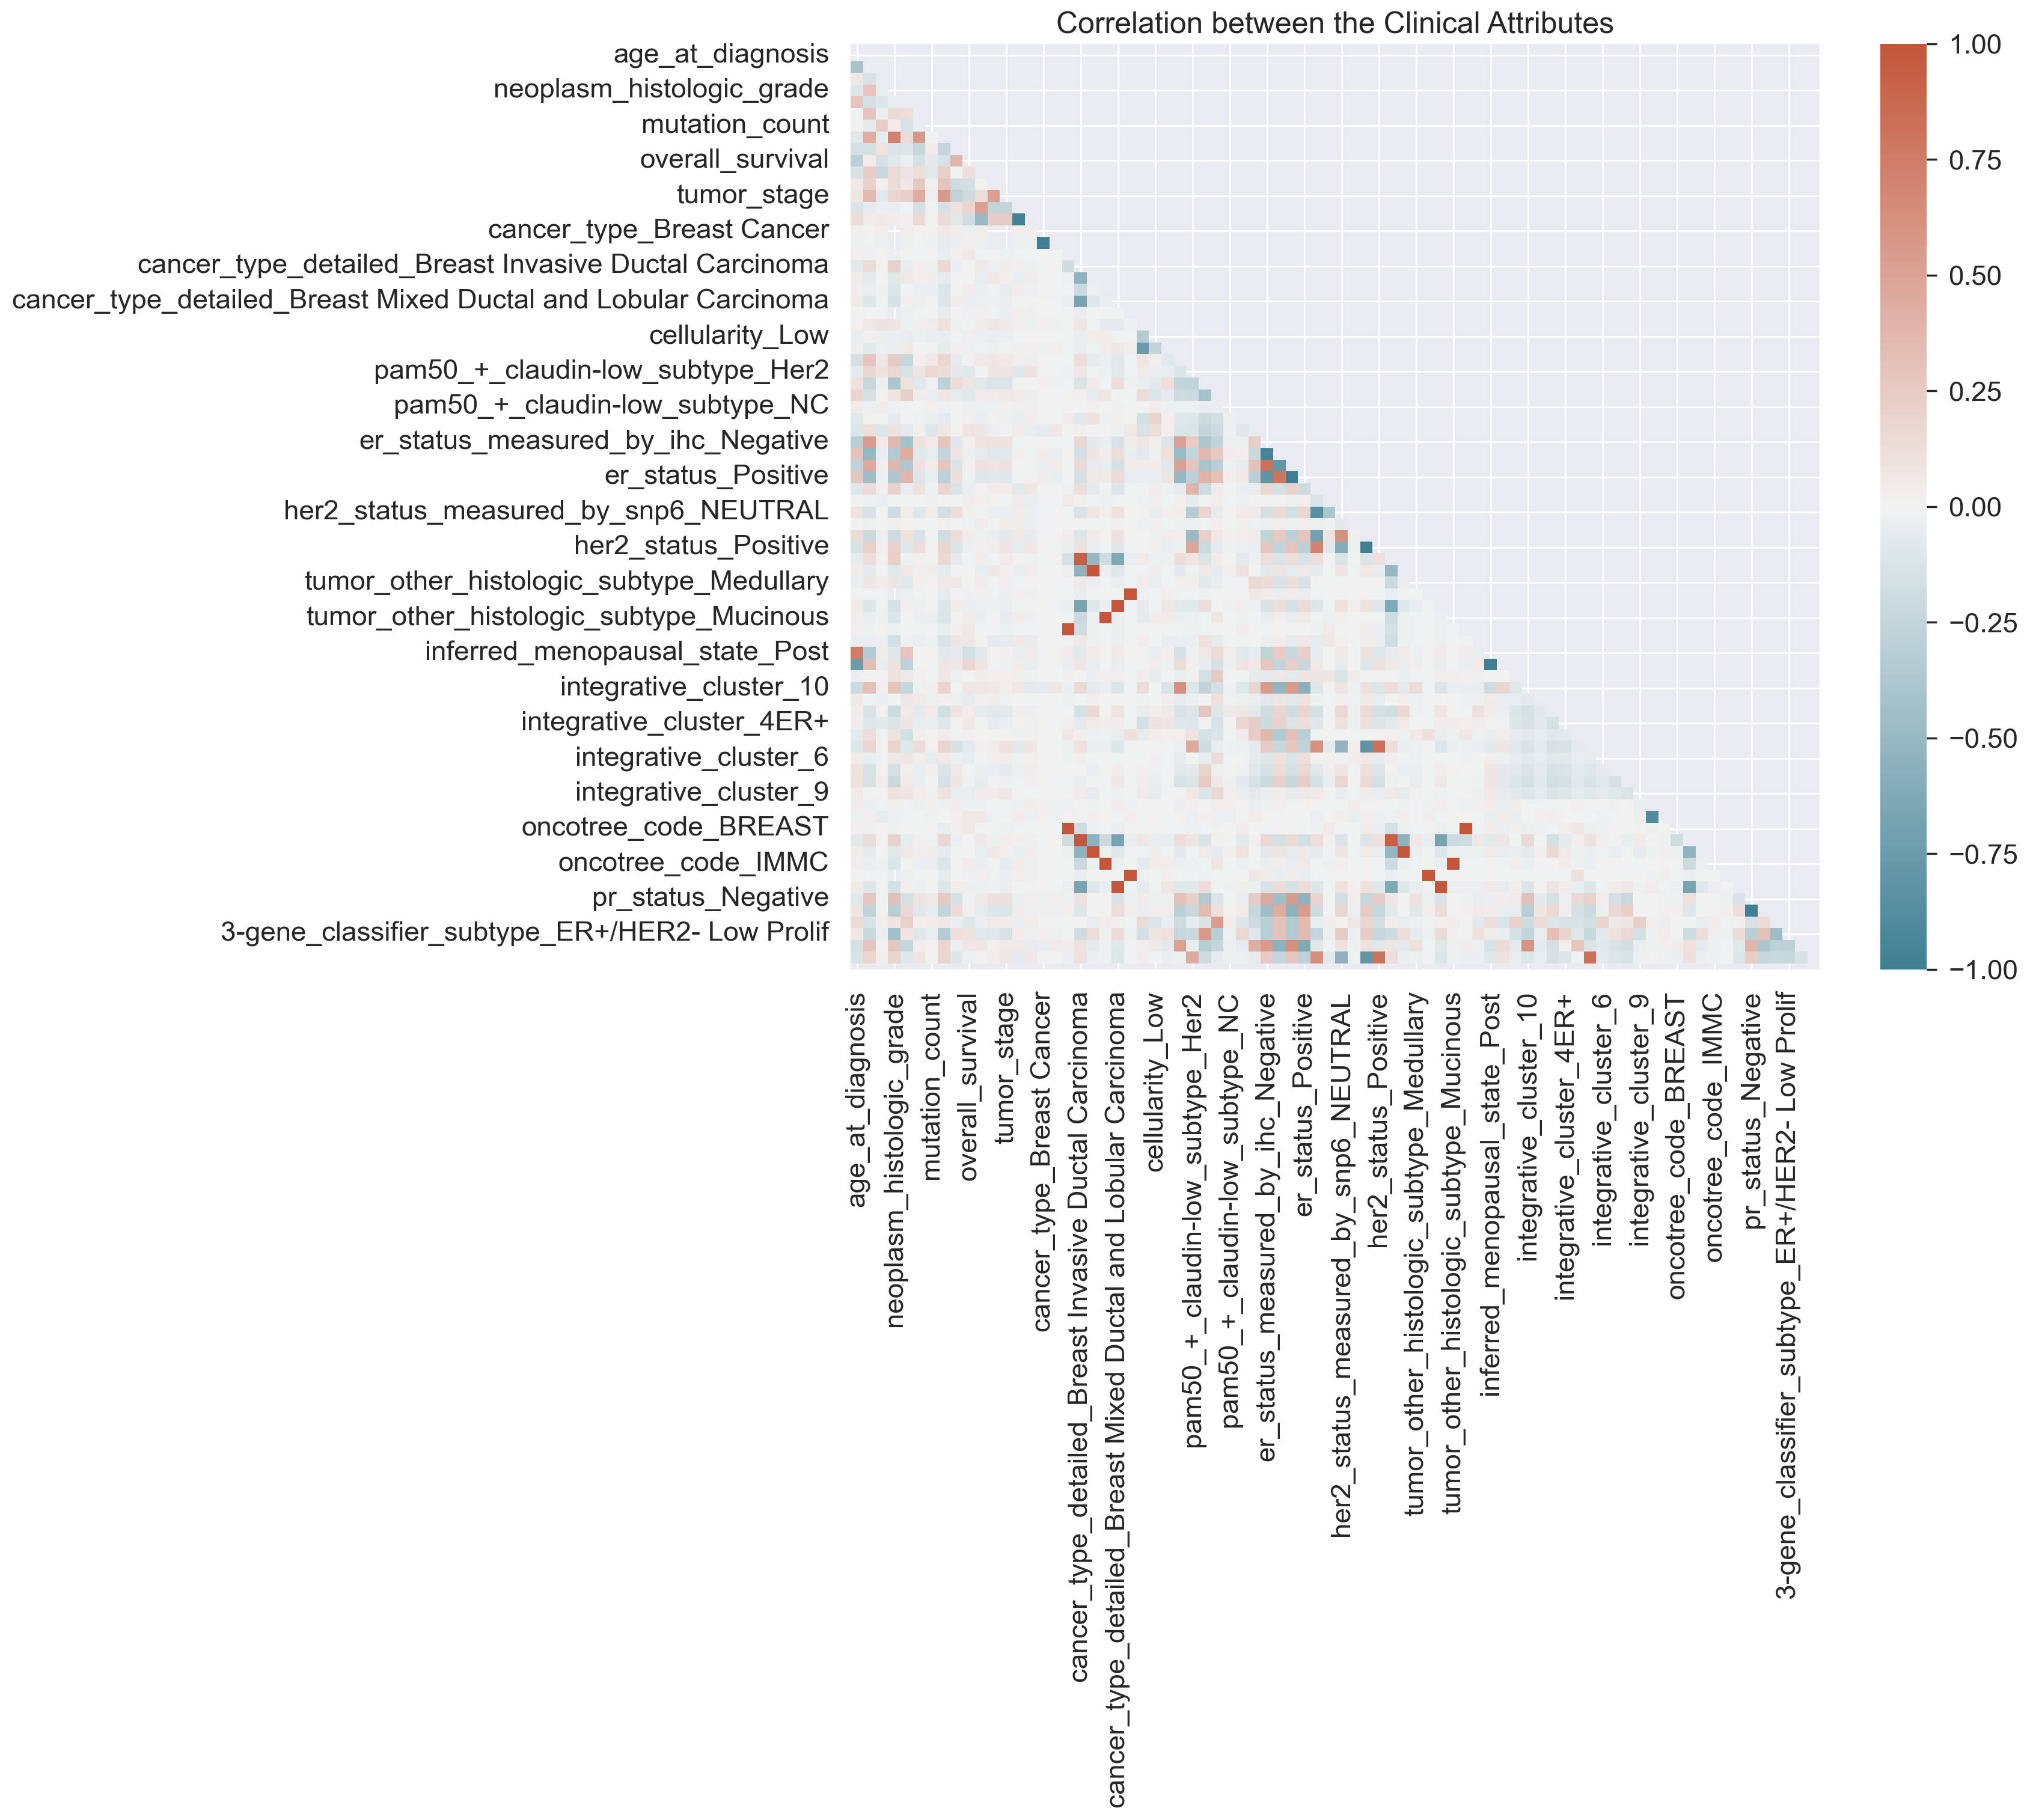

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt





# Identify categorical columns
categorical_columns = clinical_data.select_dtypes(include=['object']).columns.tolist()

# Specify unwanted columns
unwanted_columns = ['patient_id', 'death_from_cancer']

# Remove unwanted columns from the list of categorical columns
categorical_columns = [col for col in categorical_columns if col not in unwanted_columns]

# Encode categorical columns using one-hot encoding
no_id_clinical_data = pd.get_dummies(clinical_data.drop(unwanted_columns, axis=1), columns=categorical_columns)

# Compute the correlation matrix
correlation_matrix = no_id_clinical_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(13, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=sns.diverging_palette(220, 20, as_cmap=True), ax=ax, annot=False)

# Add titles and labels
plt.title('Correlation between the Clinical Attributes')

# Fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim()  # discover the values for bottom and top
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # update the ylim(bottom, top) values

# Show the plot
plt.show()


We can see that there is high correlation between some of the columns.

**Correlation between the Clinical Attributes and survival**

In [79]:
Corr_survival = no_id_clinical_data.corr()['overall_survival'].sort_values(ascending = False)
Corr_df = pd.DataFrame({'Correlation':Corr_survival})
Corr_df.head(10)

Correlation
overall_survival                                   1.000000
overall_survival_months                            0.384467
type_of_breast_surgery_BREAST CONSERVING           0.187856
inferred_menopausal_state_Pre                      0.170915
radio_therapy                                      0.112083
3-gene_classifier_subtype_ER+/HER2- Low Prolif     0.094463
pam50_+_claudin-low_subtype_claudin-low            0.091397
integrative_cluster_10                             0.076256
pam50_+_claudin-low_subtype_LumA                   0.065186
3-gene_classifier_subtype_ER-/HER2-                0.065135

In [81]:
Corr_df.tail()

Correlation
lymph_nodes_examined_positive        -0.164498
inferred_menopausal_state_Post       -0.170915
type_of_breast_surgery_MASTECTOMY    -0.184259
tumor_stage                          -0.188790
age_at_diagnosis                     -0.303666

There is a positive correlation between survival and overall survival in months, conserving surgery type, pre menopaus status, but a negative correlation between survival and lymph nodes examined positive, mastectomy surgery type, tumor stage, and age at diagnosis.

**Statistical Summaries of Clinical Columns in the Dataframe**

In [85]:
num_clinical_columns= ['age_at_diagnosis', 'lymph_nodes_examined_positive','mutation_count','nottingham_prognostic_index', 'overall_survival_months', 'tumor_size' ]
cat_clinical_columns = ['chemotherapy', 'cohort', 'neoplasm_histologic_grade','hormone_therapy', 'overall_survival', 'radio_therapy', 'tumor_stage' ]
# Statistical summary for numerical clinical attributes 
clinical_data[num_clinical_columns].describe(). T

count        mean        std    min     25%  \
age_at_diagnosis               1904.0   61.087054  12.978711  21.93  51.375   
lymph_nodes_examined_positive  1904.0    2.002101   4.079993   0.00   0.000   
mutation_count                 1859.0    5.697687   4.058778   1.00   3.000   
nottingham_prognostic_index    1904.0    4.033019   1.144492   1.00   3.046   
overall_survival_months        1904.0  125.121324  76.334148   0.00  60.825   
tumor_size                     1884.0   26.238726  15.160976   1.00  17.000   

                                      50%         75%     max  
age_at_diagnosis                61.770000   70.592500   96.29  
lymph_nodes_examined_positive    0.000000    2.000000   45.00  
mutation_count                   5.000000    7.000000   80.00  
nottingham_prognostic_index      4.042000    5.040250    6.36  
overall_survival_months        115.616667  184.716667  355.20  
tumor_size                      23.000000   30.000000  182.00

In [87]:
# Statistical summary for categorical clinical attributes 
cat_clinical_columns.extend(clinical_data.select_dtypes(include=['object']).columns.tolist())
clinical_data[cat_clinical_columns].astype('category').describe().T

count unique  \
chemotherapy                      1904      2   
cohort                          1904.0    5.0   
neoplasm_histologic_grade       1832.0    3.0   
hormone_therapy                   1904      2   
overall_survival                  1904      2   
radio_therapy                     1904      2   
tumor_stage                     1403.0    5.0   
type_of_breast_surgery            1882      2   
cancer_type                       1904      2   
cancer_type_detailed              1889      6   
cellularity                       1850      3   
pam50_+_claudin-low_subtype       1904      7   
er_status_measured_by_ihc         1874      2   
er_status                         1904      2   
her2_status_measured_by_snp6      1904      4   
her2_status                       1904      2   
tumor_other_histologic_subtype    1889      8   
inferred_menopausal_state         1904      2   
integrative_cluster               1904     11   
primary_tumor_laterality          1798      2   
oncotree_code                     1889      6   
pr_status                         1904      2   
3-gene_classifier_subtype         1700      4   
death_from_cancer                 1903      3   

                                                             top   freq  
chemotherapy                                                   0   1508  
cohort                                                       3.0  734.0  
neoplasm_histologic_grade                                    3.0  927.0  
hormone_therapy                                                1   1174  
overall_survival                                               0   1103  
radio_therapy                                                  1   1137  
tumor_stage                                                  2.0  800.0  
type_of_breast_surgery                                MASTECTOMY   1127  
cancer_type                                        Breast Cancer   1903  
cancer_type_detailed            Breast Invasive Ductal Carcinoma   1500  
cellularity                                                 High    939  
pam50_+_claudin-low_subtype                                 LumA    679  
er_status_measured_by_ihc                                Positve   1445  
er_status                                               Positive   1459  
her2_status_measured_by_snp6                             NEUTRAL   1383  
her2_status                                             Negative   1668  
tumor_other_histologic_subtype                        Ductal/NST   1454  
inferred_menopausal_state                                   Post   1493  
integrative_cluster                                            8    289  
primary_tumor_laterality                                    Left    935  
oncotree_code                                                IDC   1500  
pr_status                                               Positive   1009  
3-gene_classifier_subtype                   ER+/HER2- Low Prolif    619  
death_from_cancer                                         Living    801

In [107]:
#statistics for the no treatment group and comparison with the baseline
no_treatment = clinical_data[(clinical_data['chemotherapy']==0) & (clinical_data['hormone_therapy']==0) & (clinical_data['radio_therapy']==0)]
print("Number of patients who had no treatment: " , no_treatment.shape[0])
print("Proportion of survival in this group: " , ("%.3f" %np.mean(no_treatment["overall_survival"])))
print("Baseline Proportion of survival in all groups: ", ("%.3f" %np.mean(clinical_data["overall_survival"])))

Number of patients who had no treatment:  289
Proportion of survival in this group:  0.381
Baseline Proportion of survival in all groups:  0.421


**What are the characteristics of the average member of the population?**


The average breast cancer patient in the dataset is a 61-year-old women with a stage 2 tumor with 2 lymph nodes examined positive, with a mean tumor size of 26 mm. The patient has a probability of 76% of not having chemotherapy as a treatment, but only hormonal and radiotherapy with surgery.

In [117]:
# what the average patient looks like
print("Mean age: " + "%.3f" % np.mean(data['age_at_diagnosis']))

# Get the mode for tumor stage
tumor_stage_mode = stats.mode(data['tumor_stage'])
most_occurring_tumor_stage = int(tumor_stage_mode.mode)  # Directly convert to int
print("Most occurring tumour stage: ", most_occurring_tumor_stage)

# Get the mode for histopathological type
histopathological_type_mode = stats.mode(data['neoplasm_histologic_grade'])
most_occurring_histopathological_type = int(histopathological_type_mode.mode)  # Directly convert to int
print("Most occurring histopathological type: ", most_occurring_histopathological_type)

print("Mean tumour diameter: " + "%.3f" % np.mean(data['tumor_size']))

# Ensure that there are enough unique values to access the second one
probability_of_survival = (data["overall_survival"].value_counts() / data["overall_survival"].count())
print("Probability of survival: " + "%.3f" % probability_of_survival.iloc[1])

Mean age: 61.087
Most occurring tumour stage:  2
Most occurring histopathological type:  3
Mean tumour diameter: 26.239
Probability of survival: 0.421


The average breast cancer patient in the dataset is a 61-year-old women with a stage 2 tumor with 2 lymph nodes examined positive, with a mean tumor size of 26 mm. The patient has a probability of 76% of not having chemotherapy as a treatment, but only hormonal and radiotherapy with surgery.

**Number of outliers in each clinical feature**

In [124]:
# Selecting only numeric columns from clinical_data
numeric_cols = clinical_data.select_dtypes(include=[np.number])

# Finding the number of outliers in each numeric column
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Calculating outliers
outliers = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).sum()

# Sorting and displaying the top 7 columns with the most outliers
outliers.sort_values(ascending=False).head(7)

chemotherapy                     396
lymph_nodes_examined_positive    210
tumor_size                       142
mutation_count                    62
tumor_stage                        9
age_at_diagnosis                   1
patient_id                         0
dtype: int64

b) Relationship between genetic attributes and outcomes


In [132]:
# dropping mutations
genetic_features_to_drop = data.columns[520:]
genetic_data = data.drop(genetic_features_to_drop, axis=1)
# droping clinical data
genetic_features_to_drop = genetic_data.columns[4:35]
genetic_data = genetic_data.drop(genetic_features_to_drop, axis=1)
genetic_data = genetic_data.drop(['age_at_diagnosis','type_of_breast_surgery', 'cancer_type'], axis=1)
genetic_data = genetic_data.iloc [:,:-174]
genetic_data['overall_survival']= data['overall_survival']

genetic_data.head()

patient_id    tp53     atm    cdh1   chek2     nbn     nf1   stk11   bard1  \
0           0  0.3504  1.1517  0.0348  0.1266 -0.8361 -0.8578 -0.4294 -1.1201   
1           2 -0.0136 -0.2659  1.3594  0.7961  0.5419 -2.6059  0.5120  0.4390   
2           5  0.5141 -0.0803  1.1398  0.4187 -0.4030 -1.1305  0.2362 -0.1721   
3           6  1.6708 -0.8880  1.2491 -1.1889 -0.4174 -0.6165  1.0078 -0.4010   
4           8  0.3484  0.3897  0.9131  0.9356  0.7675 -0.2940 -0.2961  0.6320   

     mlh1  ...  tubb4a  tubb4b  twist1  adgra2    afdn    aff2    agmo  \
0 -0.4844  ... -0.0250 -0.4113  2.8096  2.8014 -0.0004  0.9673  0.3011   
1  1.2266  ... -0.1003  0.7791 -0.2273 -0.4462 -1.9854  0.5022 -0.9526   
2 -1.7910  ...  1.2084 -0.6572  0.1984 -1.0721 -0.9729  0.0515  0.1109   
3 -1.3905  ...  0.3142 -0.4413  0.1932 -1.0215  0.4553 -0.2354  0.4003   
4 -0.3582  ... -0.6606 -1.4697  0.4128 -1.5326 -0.4795  1.0052  0.9739   

    agtr2   ahnak  overall_survival  
0 -0.8436  1.8227                 1  
1 -1.8435  1.6662                 1  
2  0.9874 -0.0154                 0  
3  1.4839  0.3101                 1  
4  0.8825 -0.7598                 0  

[5 rows x 313 columns]

In [140]:
#Finding Maximum values and std in each column, std is always 1 because the datapoints are z-scores
max_values = genetic_data.max()
std = genetic_data.std(axis = 0, skipna = True)
max_data = pd.concat([max_values, std], axis = 1, keys = ['max_values', 'std'])
max_data.sort_values(by='max_values', ascending = False).head()

max_values          std
patient_id   7299.0000  2358.478332
tubb4a         18.6351     1.000263
hes5           17.1431     1.000262
itgb3          15.3308     1.000263
slco1b3        14.8651     1.000262

In [142]:
#Finding minimum values and std in each column, std is always 1 because the datapoints are z-scores
min_values = genetic_data.min()
std = genetic_data.std(axis = 0, skipna = True)
min_data = pd.concat([min_values, std], axis = 1, keys = ['min_values', 'std'])
min_data.sort_values(by='min_values', ascending = True).head()

min_values       std
mlh1      -6.4387  1.000262
rab25     -6.3503  1.000264
hdac1     -5.9821  1.000263
spen      -5.9510  1.000263
foxo3     -5.7543  1.000263

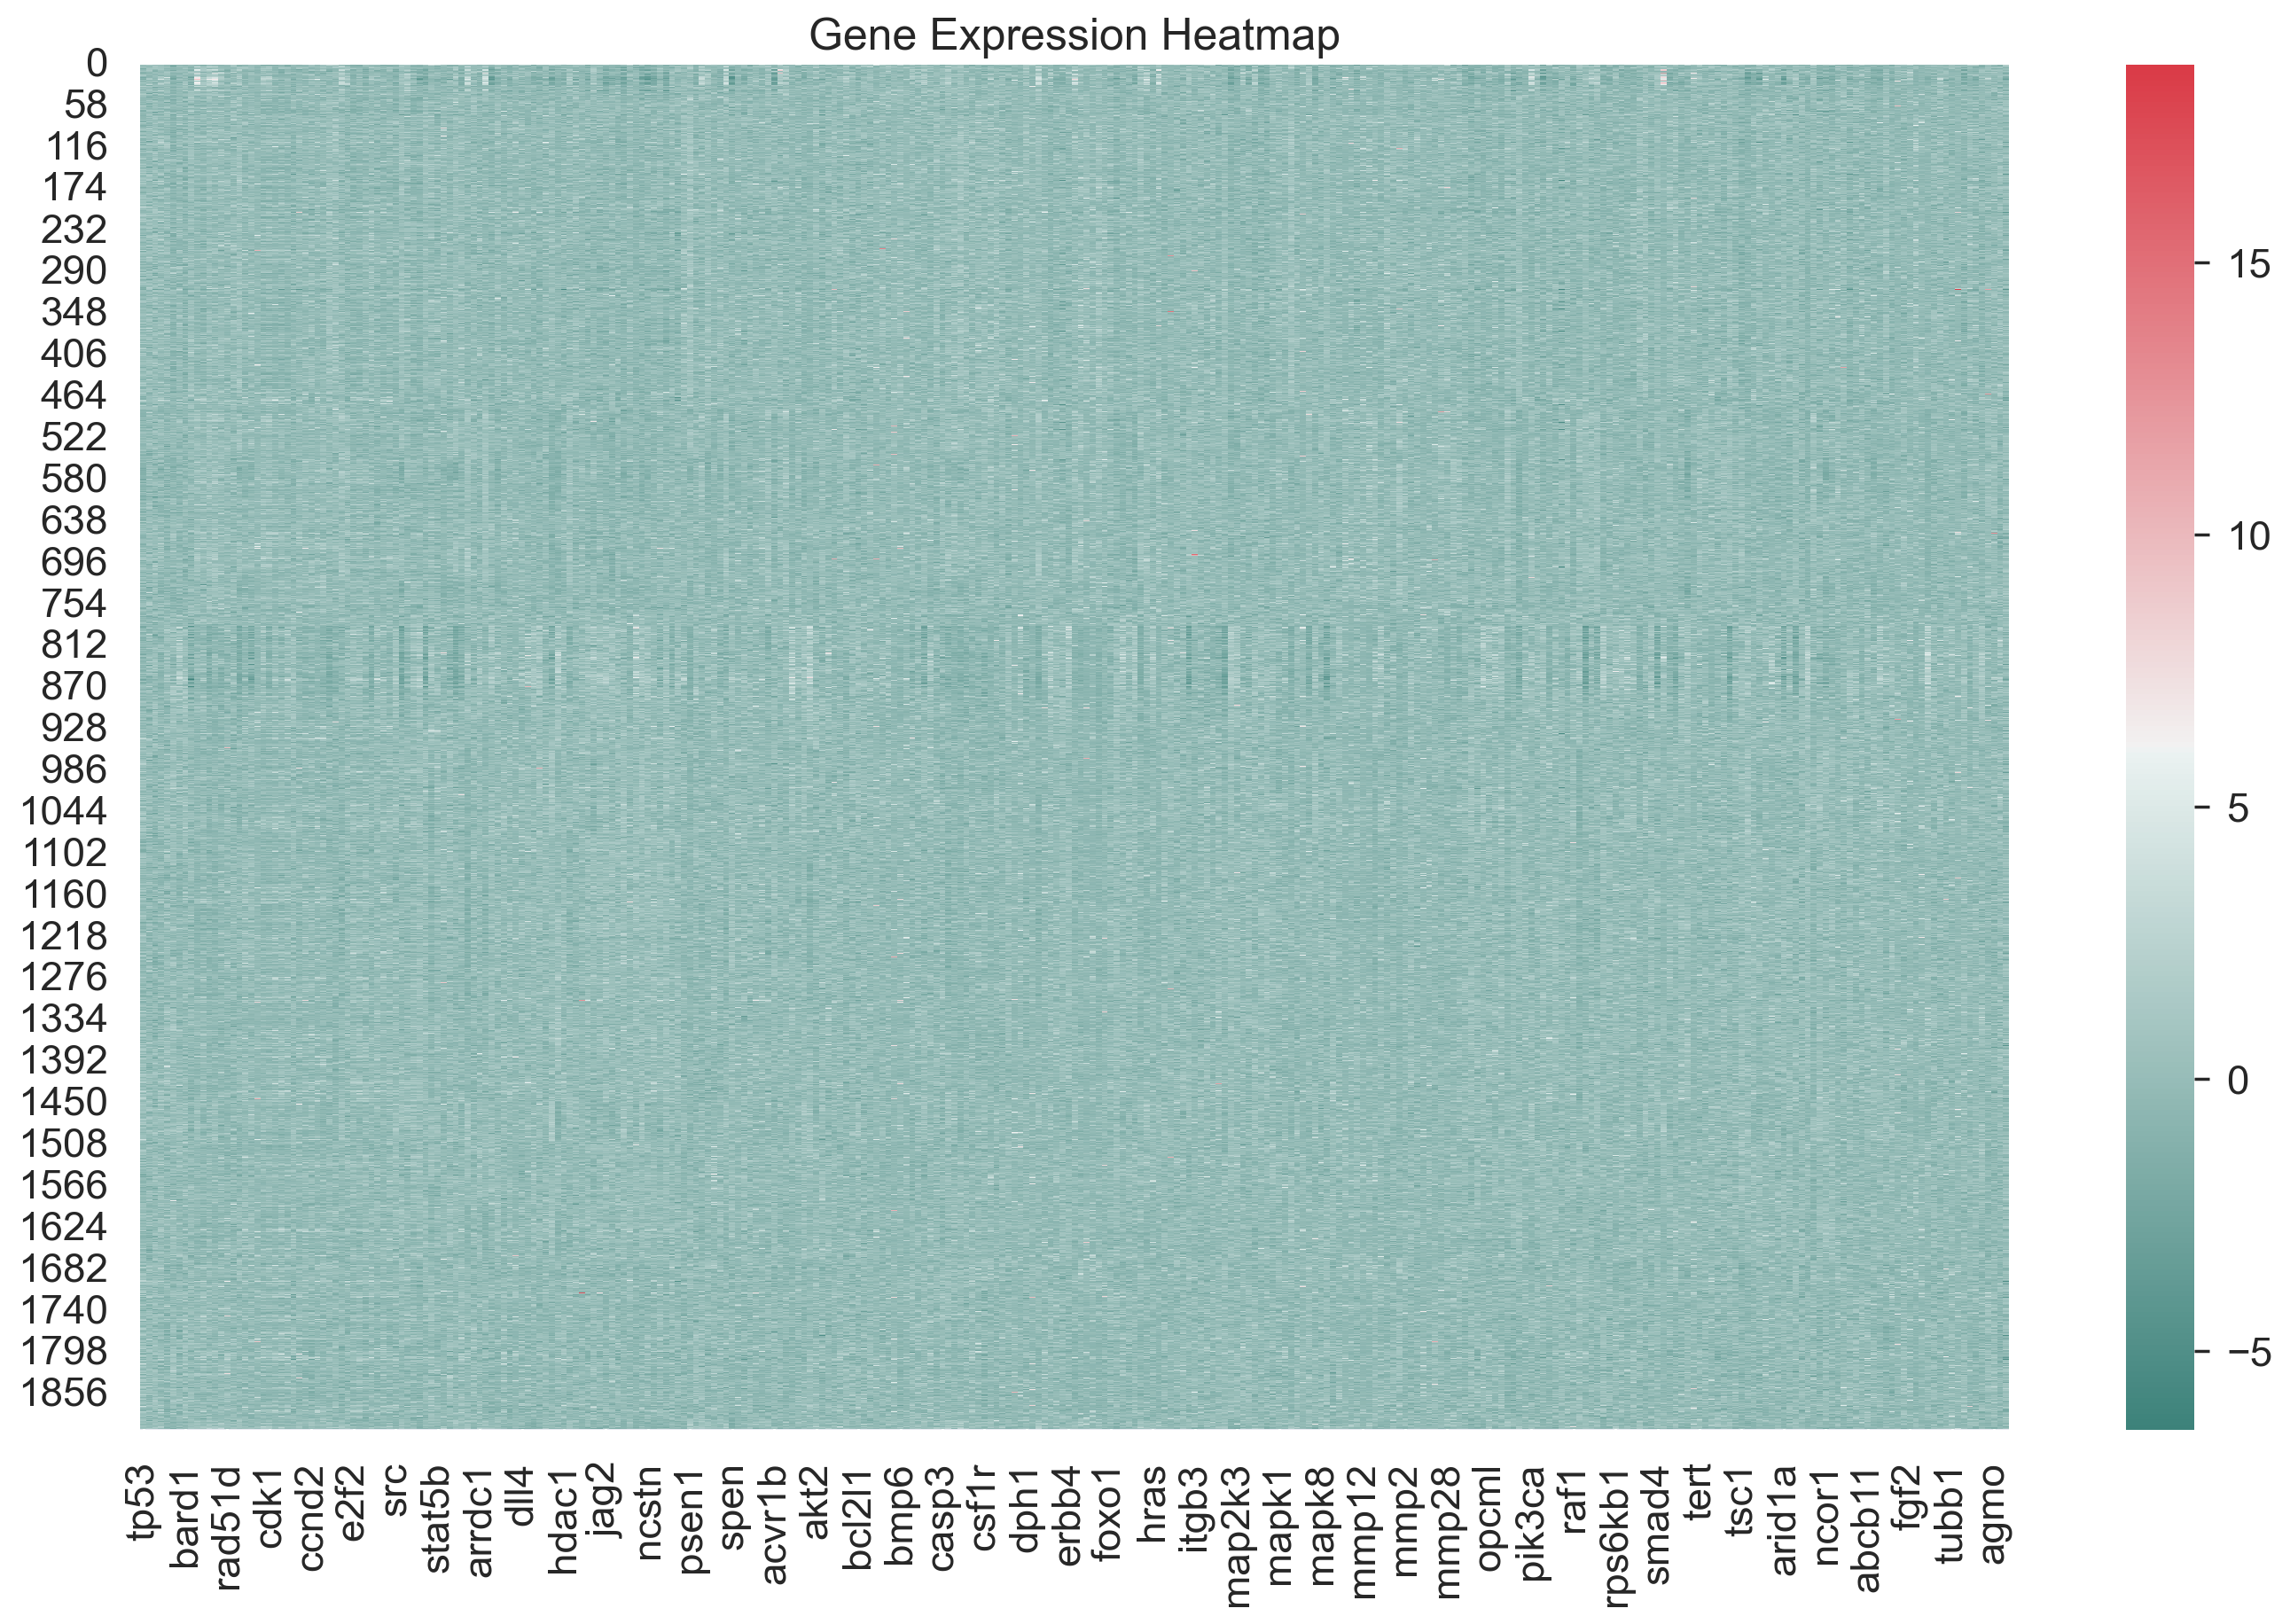

In [144]:
# Visualizing the mRNA values in a heatmap.
fig, axs = plt.subplots(figsize = (17, 10)) 
sns.heatmap(genetic_data.drop(['patient_id','overall_survival'], axis=1), ax = axs, cmap = sns.diverging_palette(180, 10, as_cmap = True))
plt.title('Gene Expression Heatmap')

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

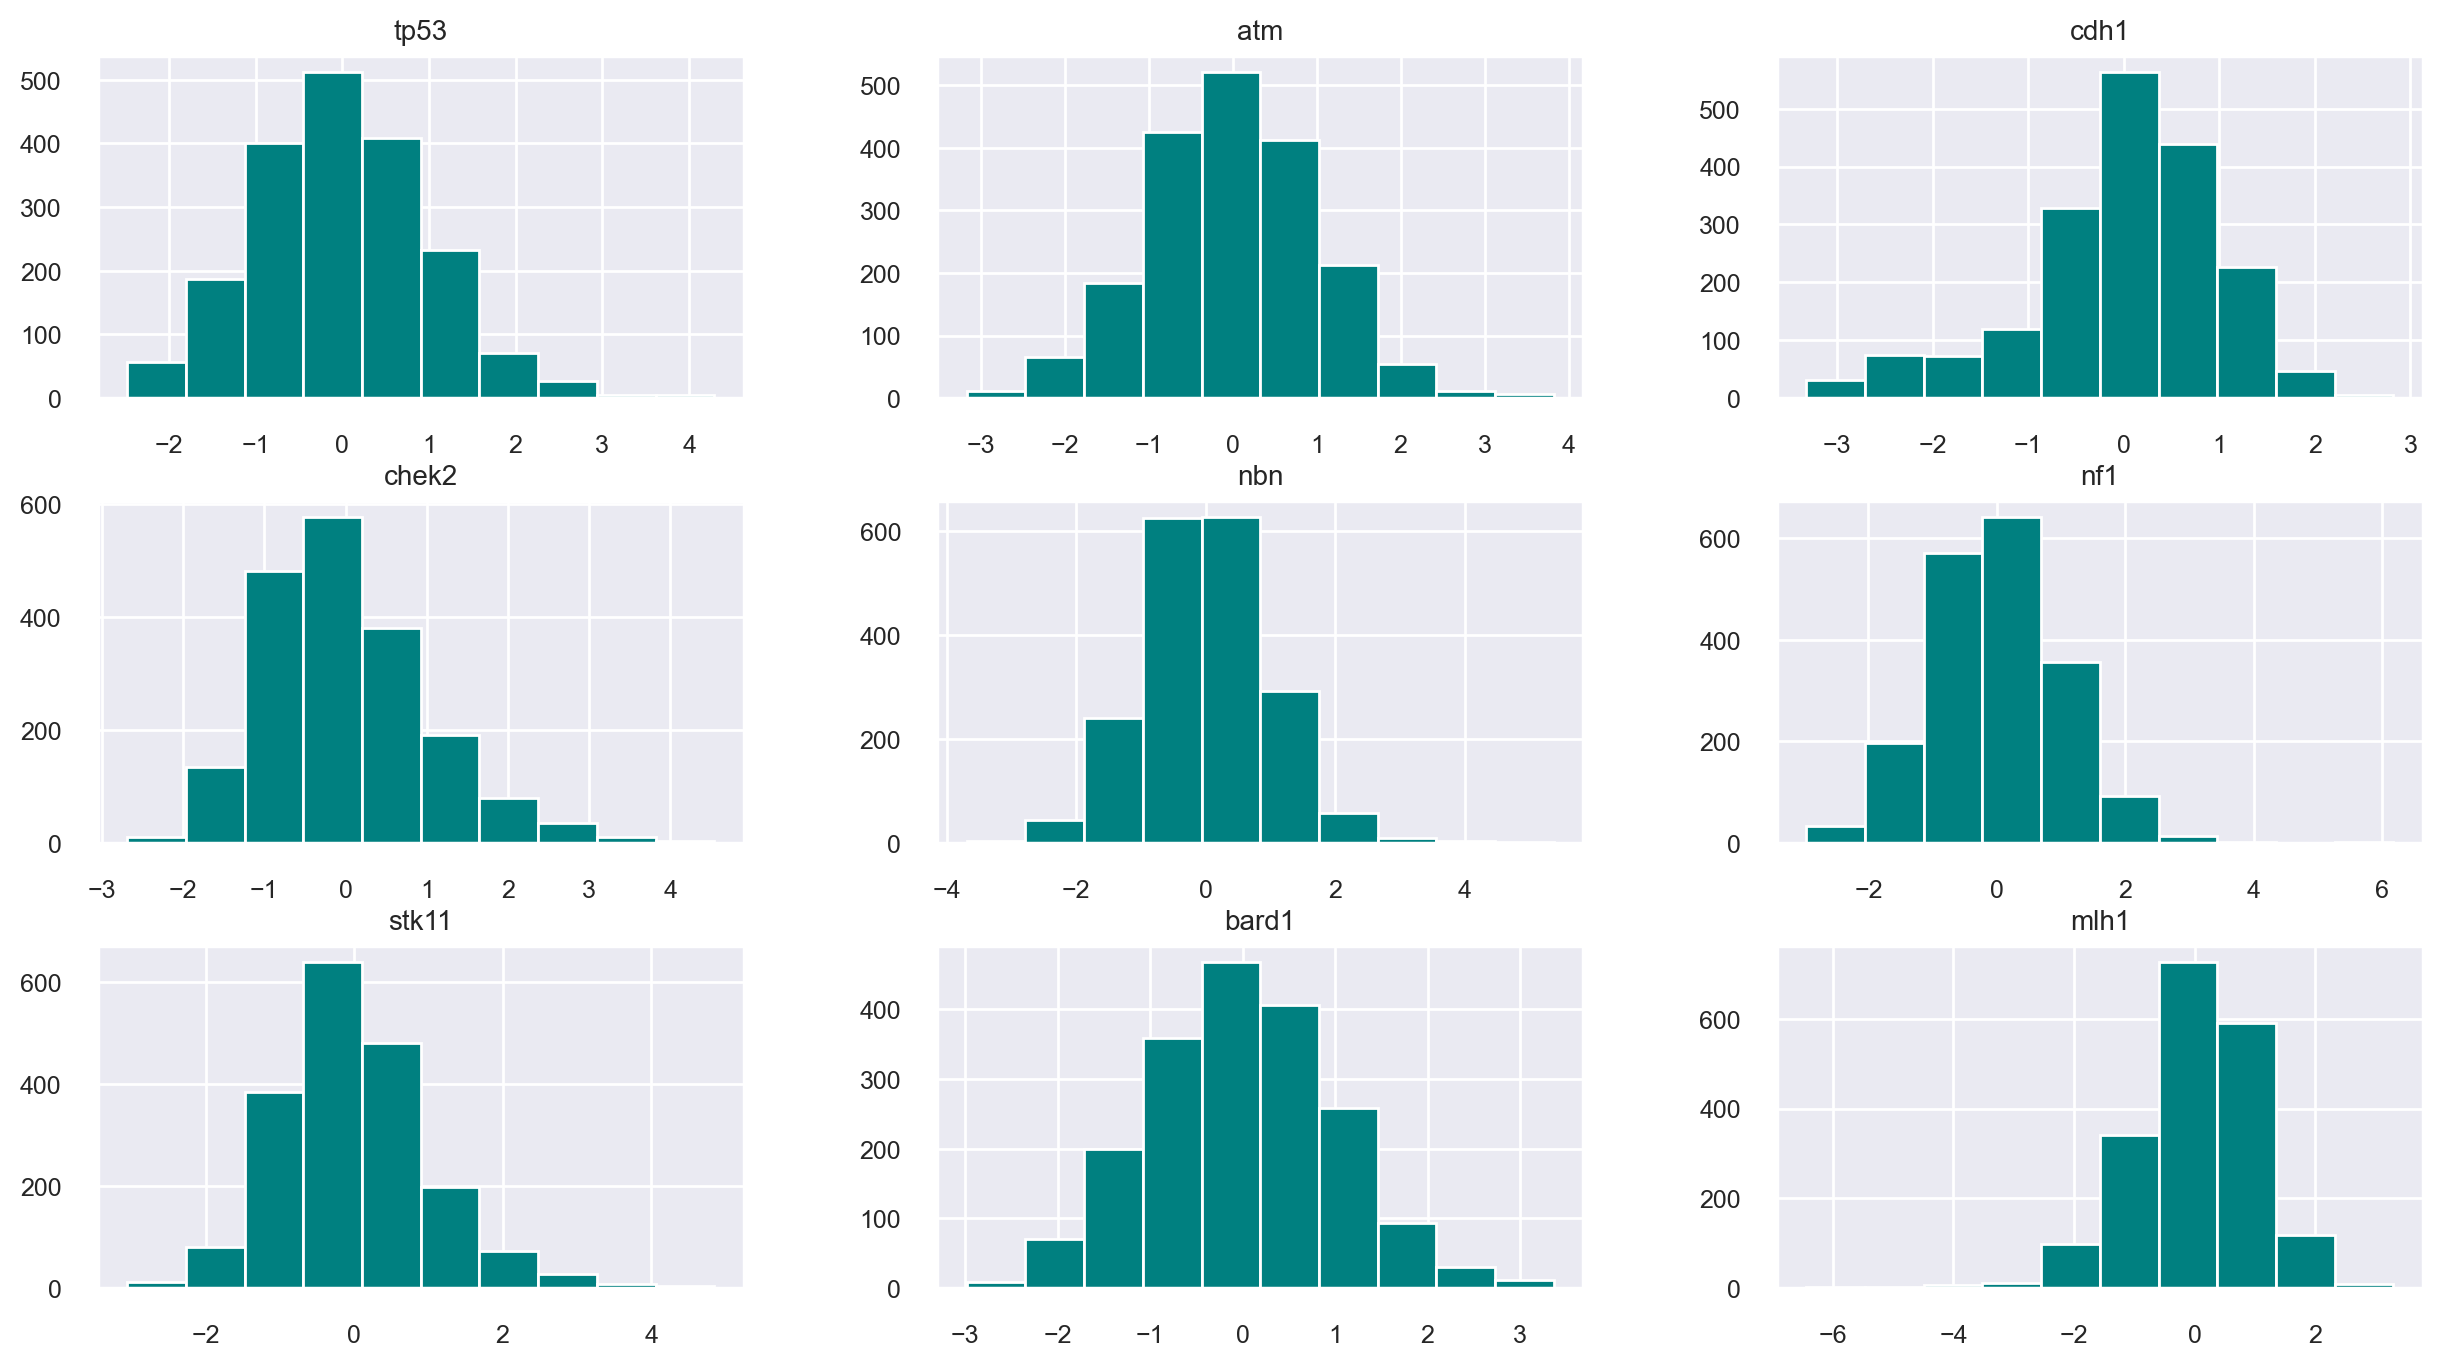

In [146]:
params = {'axes.titlesize':'10',
          'xtick.labelsize':'9',
          'ytick.labelsize':'9'}
matplotlib.rcParams.update(params)
#plt.subplots_adjust(hspace=0.5) 
genetic_data.drop(['patient_id','overall_survival'], axis=1).iloc[:,:9].hist(figsize=(15,8), color=color_hist)
plt.show()

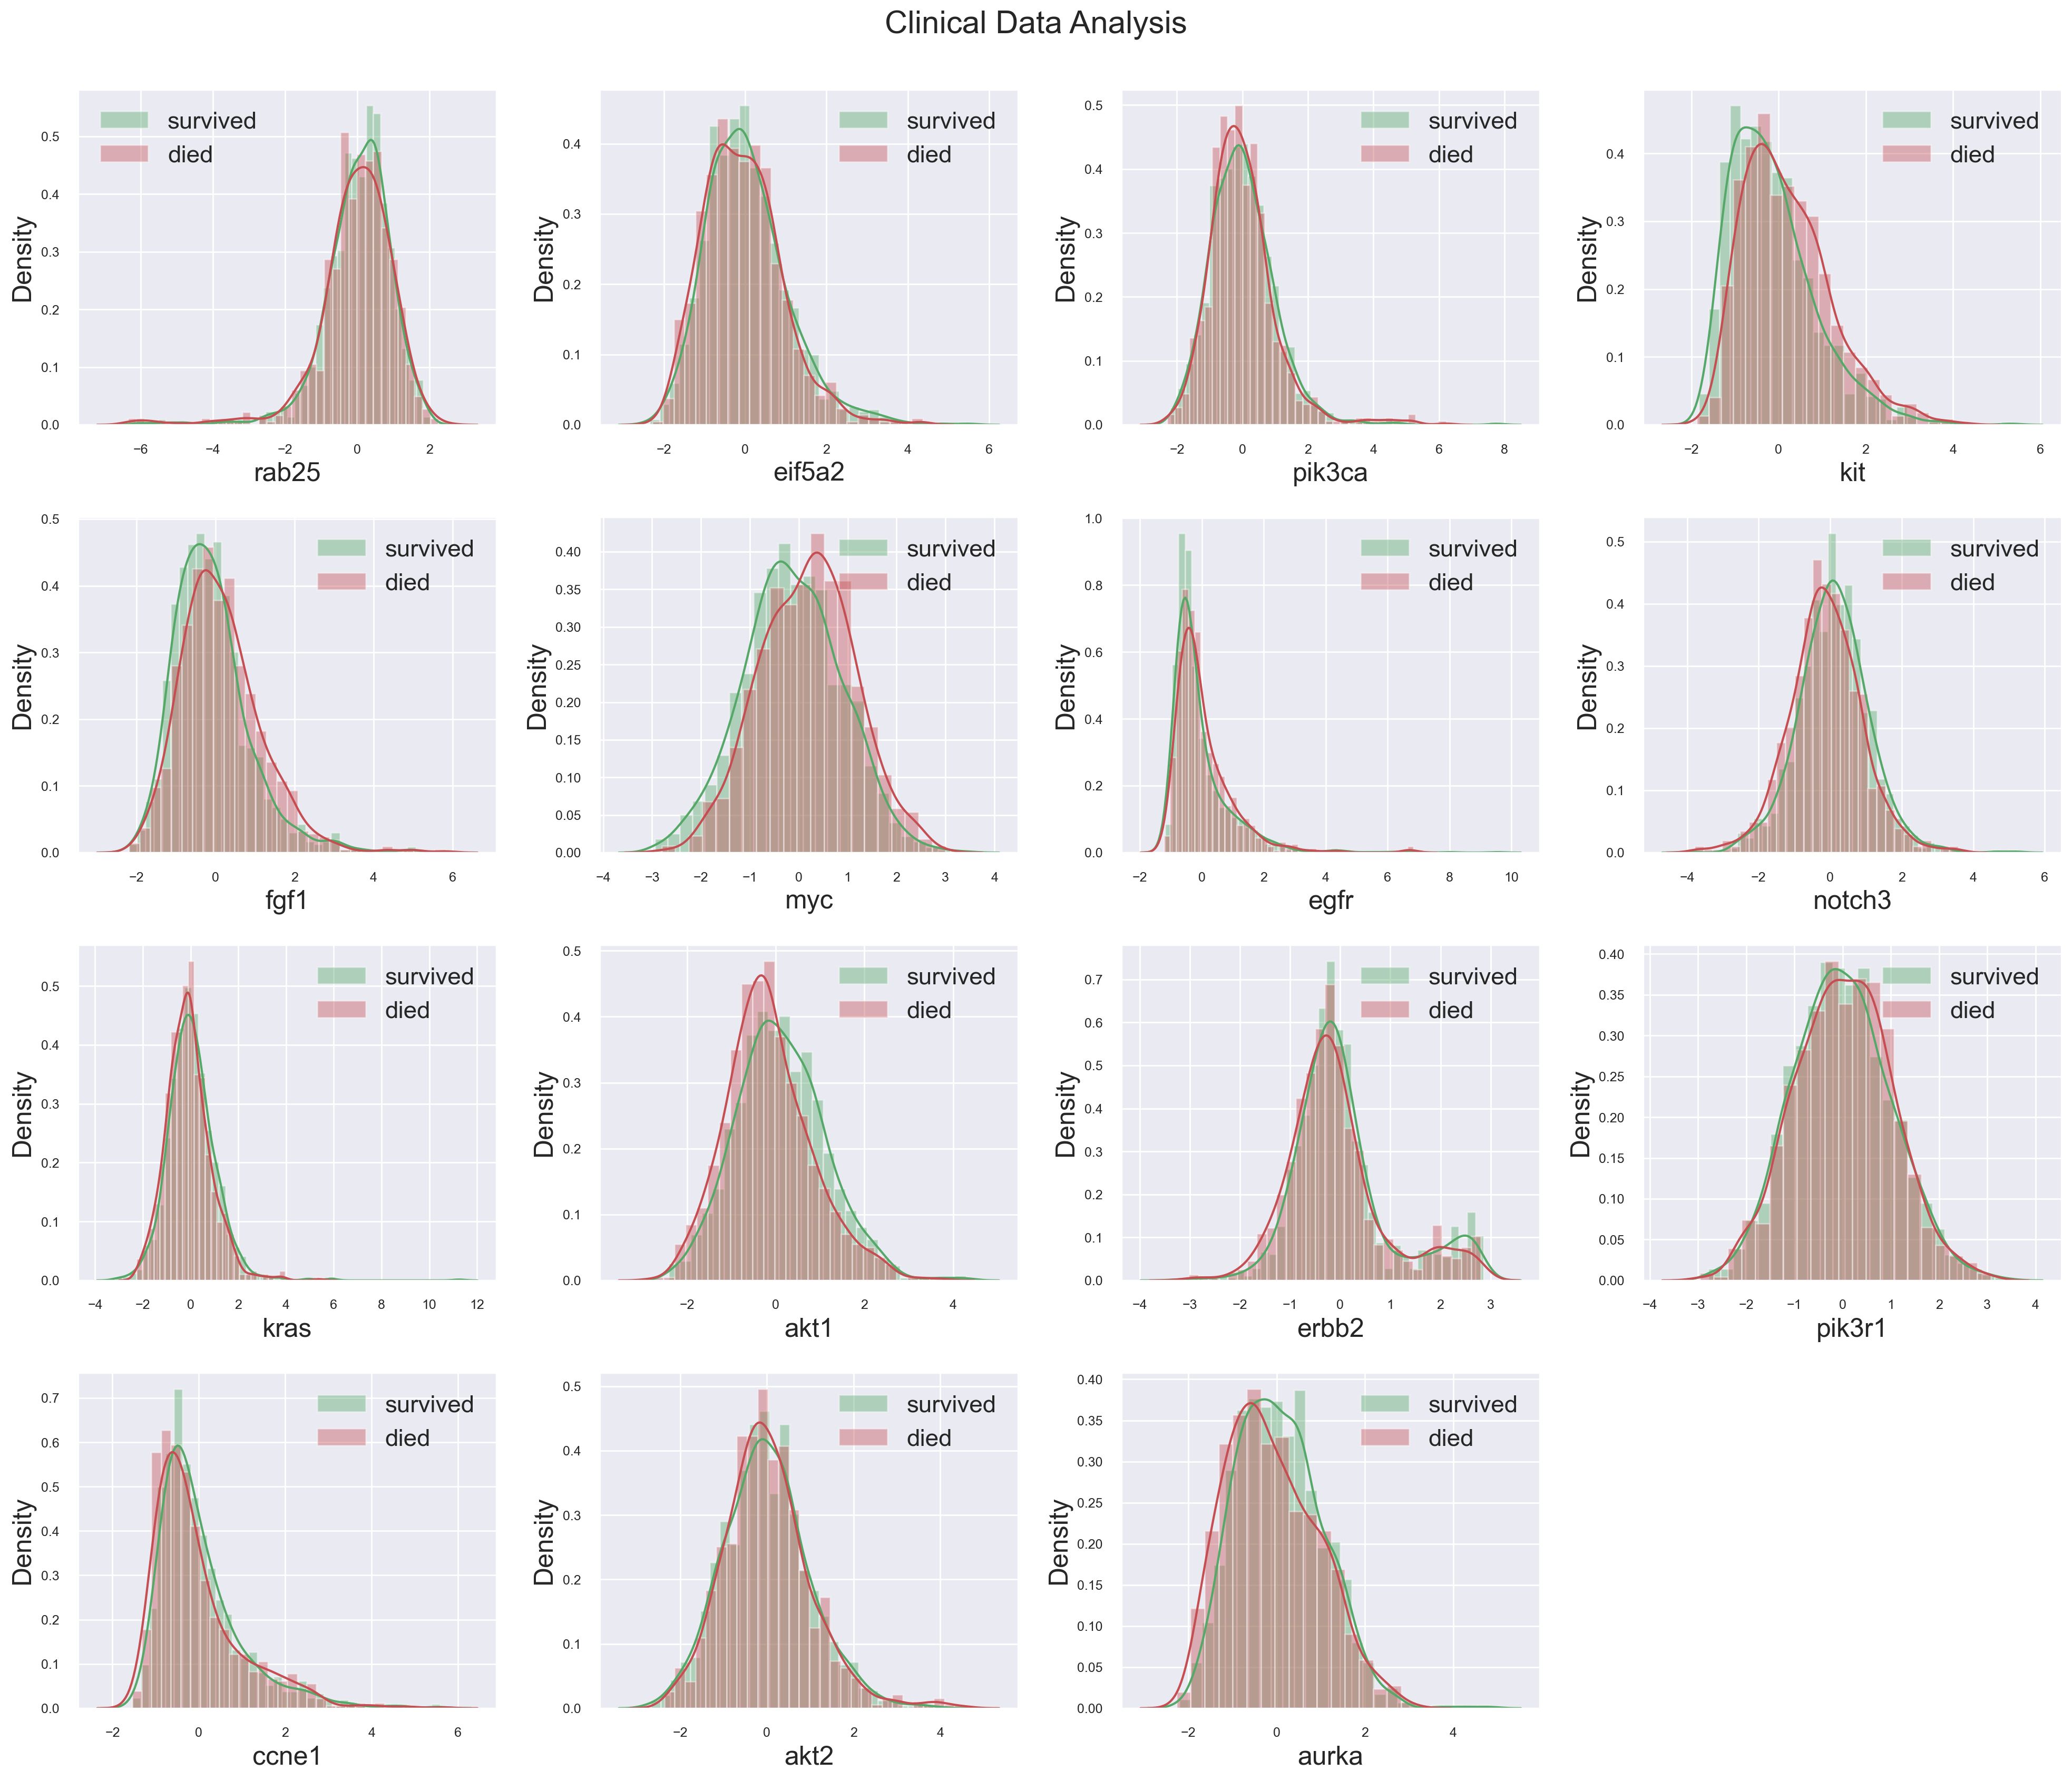

In [150]:
fig = plt.figure(figsize = (20, 25))
j = 0

gene_list = ['rab25', 'eif5a2', 'pik3ca', 'kit', 'fgf1', 'myc', 'egfr', 'notch3', 'kras', 'akt1', 'erbb2', 'pik3r1', 'ccne1', 'akt2', 'aurka']
for i in genetic_data.drop(['patient_id'], axis=1).loc[:,gene_list].columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(genetic_data[i][genetic_data['overall_survival']==0], color='g', label = 'survived')
    sns.distplot(genetic_data[i][genetic_data['overall_survival']==1], color='r', label = 'died')
    plt.legend(loc='best')
fig.suptitle('Clinical Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

The distribution of data in the two classes of survival are very similar with few outliers in some genes.



In [153]:
print('Maximum value possible in genetic data:', genetic_data.drop(['patient_id','overall_survival'], axis = 1).max().max())
print('Minimum value possible in genetic data:', genetic_data.drop(['patient_id','overall_survival'], axis = 1).min().min())

Maximum value possible in genetic data: 18.6351
Minimum value possible in genetic data: -6.4387


#### Number of outliers in the top 10 genetic features

In [158]:
#Finding number of outliers in each column
Q1 = genetic_data.quantile(0.25)
Q3 = genetic_data.quantile(0.75)
IQR = Q3 - Q1
((genetic_data < (Q1 - 1.5 * IQR)) | (genetic_data > (Q3 + 1.5 * IQR))).sum().sort_values(ascending = False).head(10)

erbb2     224
dll3      194
mmp1      186
mmp12     180
cdkn2a    179
ccna1     154
bmp7      152
wwox      148
map2      144
folr1     142
dtype: int64

#### Visualize Correlation of between the genetic Attributes and outcome
